ADF Statistic: -0.8403787620180897
p-value: 0.8069725057078143
Time series is non-stationary. Differencing is needed.
ADF Statistic: -2.108863473342409
p-value: 0.24096552316170167
Time series is non-stationary. Differencing is needed.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-41-de196e350ceb>:61: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=future_steps+1, freq='M')[1:], forecast, label='Forecast', linestyle='dashed')


                                         SARIMAX Results                                         
Dep. Variable:     Bread, white, pan, per lb. (453.6 gm)   No. Observations:                  120
Model:                    SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 224.517
Date:                                   Mon, 24 Mar 2025   AIC                           -439.034
Time:                                           00:31:57   BIC                           -425.670
Sample:                                       01-01-2015   HQIC                          -433.616
                                            - 12-01-2024                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6393      0.605     -1.057      0.290    

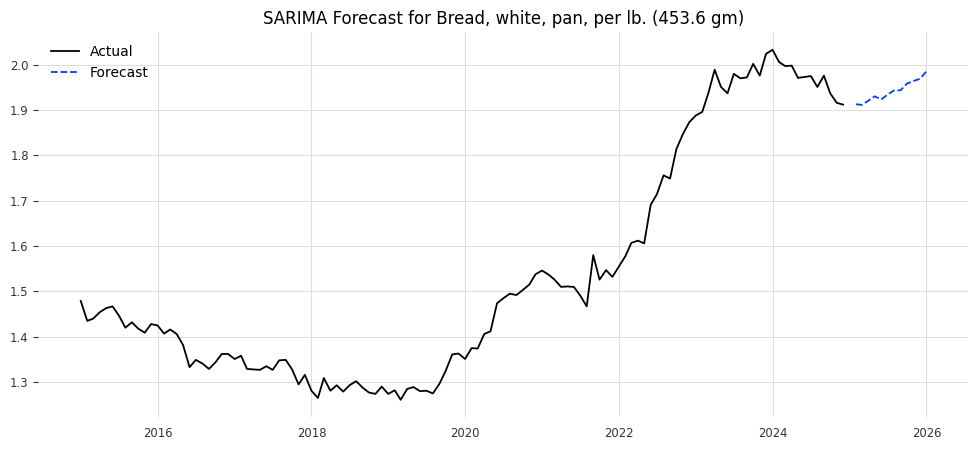

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset with error handling
file_path = "merged_bls_data.csv"  # Updated file path
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError(f"Error: The file '{file_path}' was not found. Please upload the correct file.")

# Convert 'year_month' to datetime and set index
df['year_month'] = pd.to_datetime(df['year_month'])
df.set_index('year_month', inplace=True)

# Select a column to analyze (change this if needed)
target_col = "Bread, white, pan, per lb. (453.6 gm)"
if target_col not in df.columns:
    raise KeyError(f"Error: Column '{target_col}' not found in the dataset. Available columns: {df.columns.tolist()}")

data = df[[target_col]].dropna()

# Check stationarity
def check_stationarity(ts):
    result = adfuller(ts.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] > 0.05:
        print("Time series is non-stationary. Differencing is needed.")
    else:
        print("Time series is stationary.")

check_stationarity(data[target_col])

# Differencing if necessary
data_diff = data.diff().dropna()
check_stationarity(data_diff[target_col])

# Manually set SARIMA parameters (based on domain knowledge or previous tuning)
p, d, q = 1, 1, 1  # ARIMA parameters
P, D, Q, S = 1, 1, 1, 12  # Seasonal parameters

# Fit SARIMA model
# Fit SARIMA model
# The seasonal_order should only have 4 elements (P, D, Q, S)
model = SARIMAX(data[target_col], order=(p, d, q), seasonal_order=(P, D, Q, S)) # Removed the extra '12'
model_fit = model.fit()
print(model_fit.summary())

# Forecasting
future_steps = 12  # Forecast next 12 months
forecast = model_fit.forecast(steps=future_steps)

# Plot results
plt.figure(figsize=(12, 5))
plt.plot(data.index, data[target_col], label='Actual')
plt.plot(pd.date_range(data.index[-1], periods=future_steps+1, freq='M')[1:], forecast, label='Forecast', linestyle='dashed')
plt.legend()
plt.title(f'SARIMA Forecast for {target_col}')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ... (Load and prepare data as before) ...

# Store forecasts in a dictionary
forecasts = {}

# Iterate through columns (excluding 'year_month' if it's still present)
for product_col in df.columns:
    if product_col != 'year_month':  # Skip 'year_month' if it's still a column
        data = df[[product_col]].dropna()

        # ... (Check stationarity and differencing as before) ...

        # Fit SARIMA model
        model = SARIMAX(data[product_col], order=(p, d, q), seasonal_order=(P, D, Q, S))
        model_fit = model.fit()

        # Forecasting
        forecast = model_fit.forecast(steps=future_steps)

        # Store forecast in the dictionary
        forecasts[product_col] = forecast

# Cross-comparison and Visualization
# ... (Code to compare and visualize forecasts) ...

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/

<ipython-input-54-870349859782>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=future_steps + 1, freq='M')[1:], forecast, label=product_col)


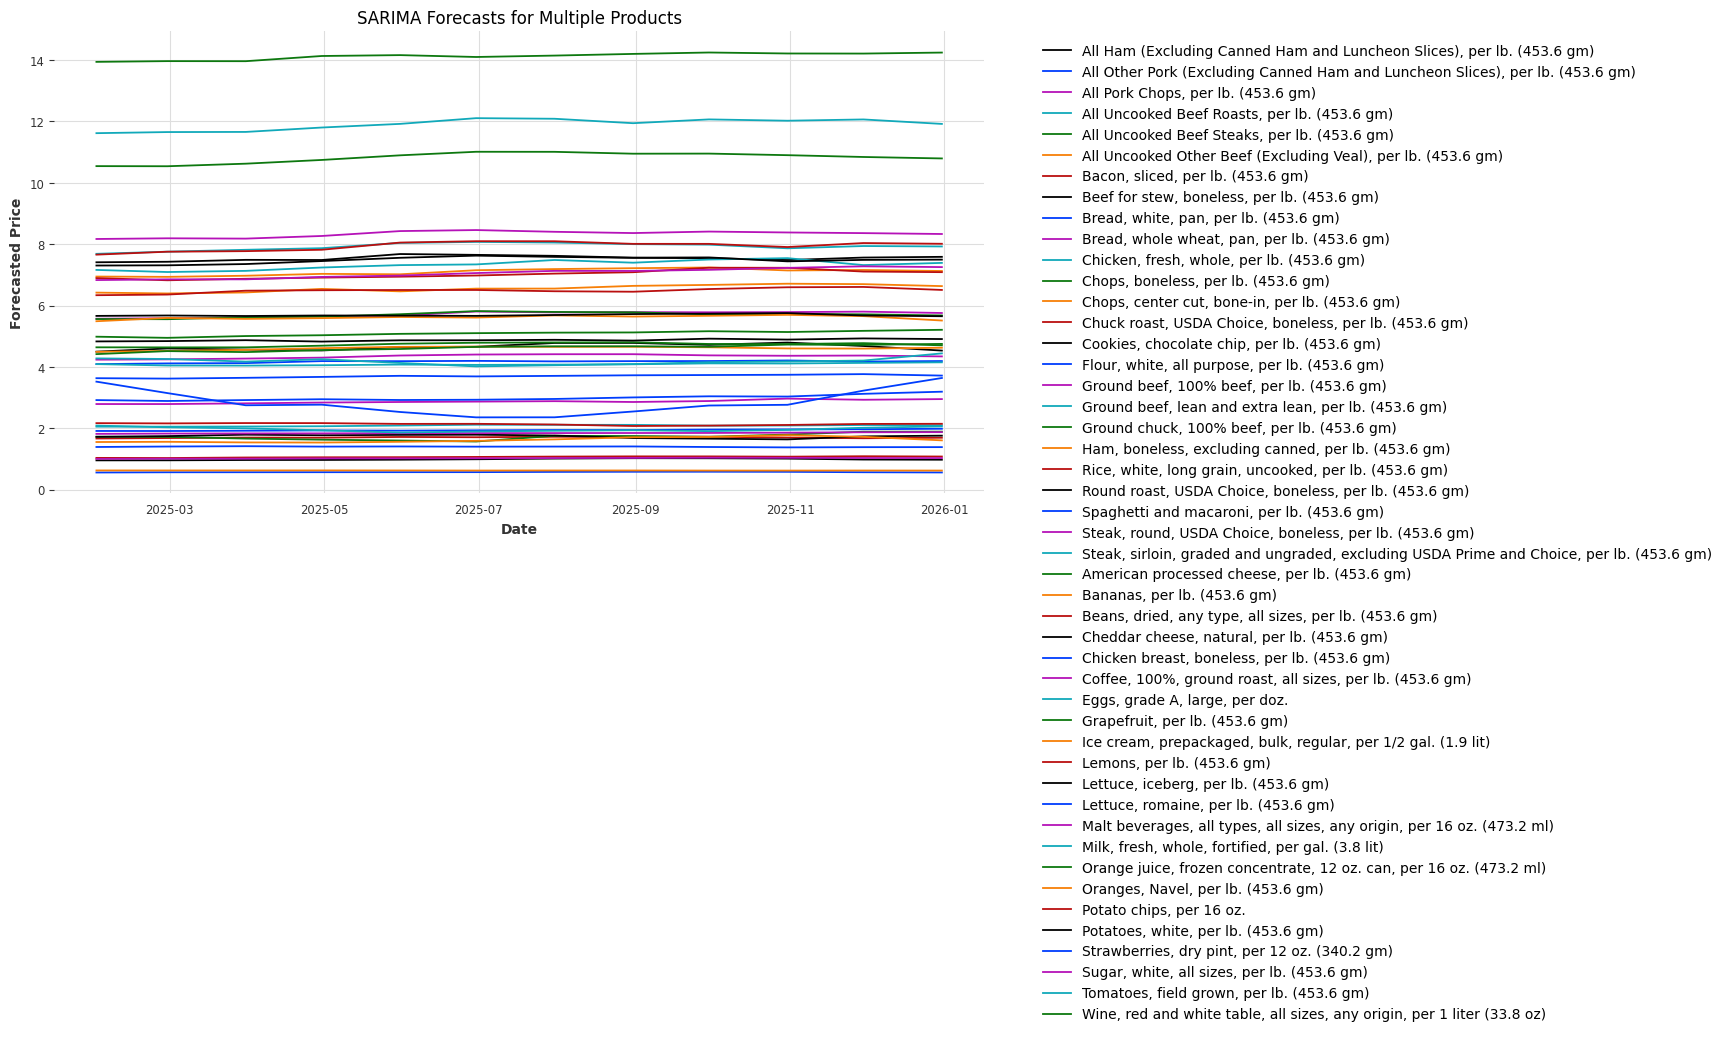

In [ ]:
plt.figure(figsize=(12, 6))
for product_col, forecast in forecasts.items():
    plt.plot(pd.date_range(data.index[-1], periods=future_steps + 1, freq='M')[1:], forecast, label=product_col)
plt.legend()
plt.title('SARIMA Forecasts for Multiple Products')
plt.xlabel('Date')
plt.ylabel('Forecasted Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<ipython-input-55-e1b8a1930200>:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=future_steps + 1, freq='M')[1:],
<ipython-input-55-e1b8a1930200>:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=future_steps + 1, freq='M')[1:],


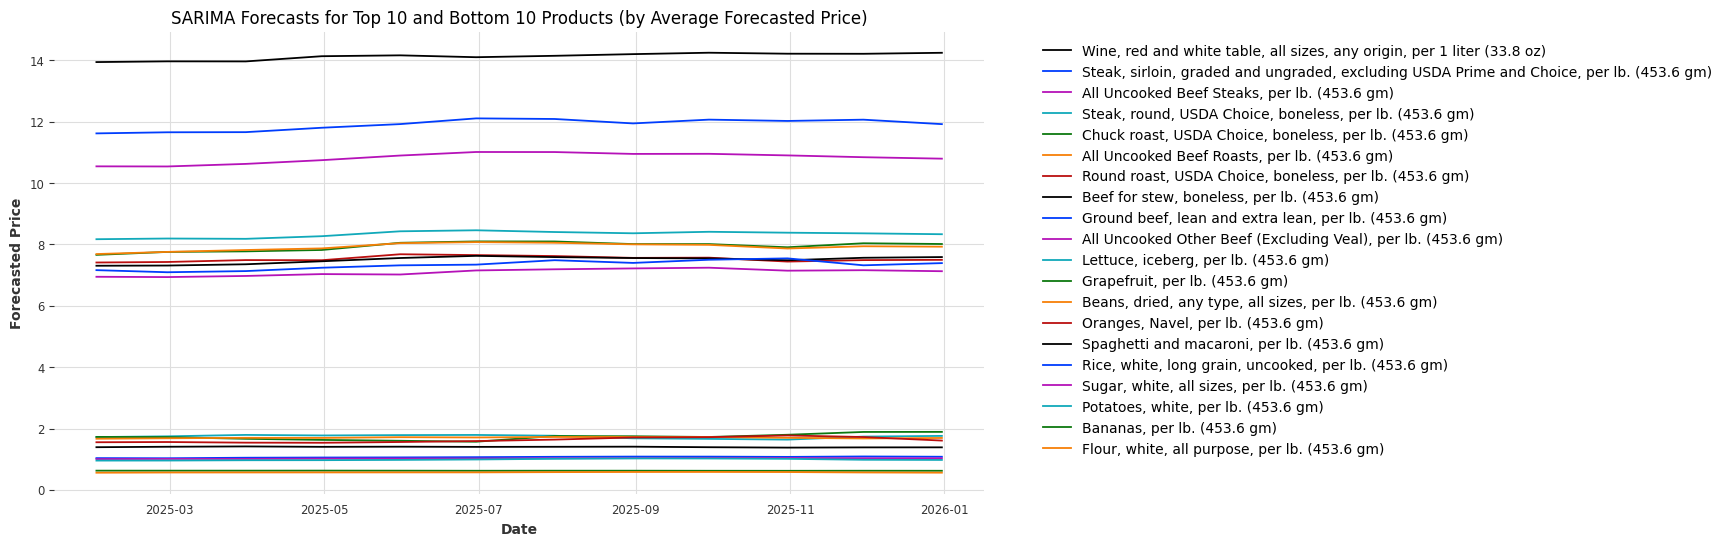

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ... (Your existing code for loading data, fitting SARIMA,
# and storing forecasts in the 'forecasts' dictionary) ...

# Calculate average forecasted prices for each product
avg_forecasts = {product: np.mean(forecast) for product, forecast in forecasts.items()}

# Sort products by average forecasted price
sorted_products = sorted(avg_forecasts, key=avg_forecasts.get, reverse=True)

# Select top 10 and bottom 10 products
top_10_products = sorted_products[:10]
bottom_10_products = sorted_products[-10:]

# Create the plot
plt.figure(figsize=(12, 6))

# Plot top 10 forecasts
for product in top_10_products:
    forecast = forecasts[product]
    plt.plot(pd.date_range(data.index[-1], periods=future_steps + 1, freq='M')[1:],
             forecast, label=product)

# Plot bottom 10 forecasts
for product in bottom_10_products:
    forecast = forecasts[product]
    plt.plot(pd.date_range(data.index[-1], periods=future_steps + 1, freq='M')[1:],
             forecast, label=product)

# Customize the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('SARIMA Forecasts for Top 10 and Bottom 10 Products (by Average Forecasted Price)')
plt.xlabel('Date')
plt.ylabel('Forecasted Price')
plt.show()

<ipython-input-56-cf8970f498f4>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  rainbow_cmap = cm.get_cmap('rainbow')
<ipython-input-56-cf8970f498f4>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=future_steps + 1, freq='M')[1:],
<ipython-input-56-cf8970f498f4>:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=future_steps + 1, freq='M')[1:],


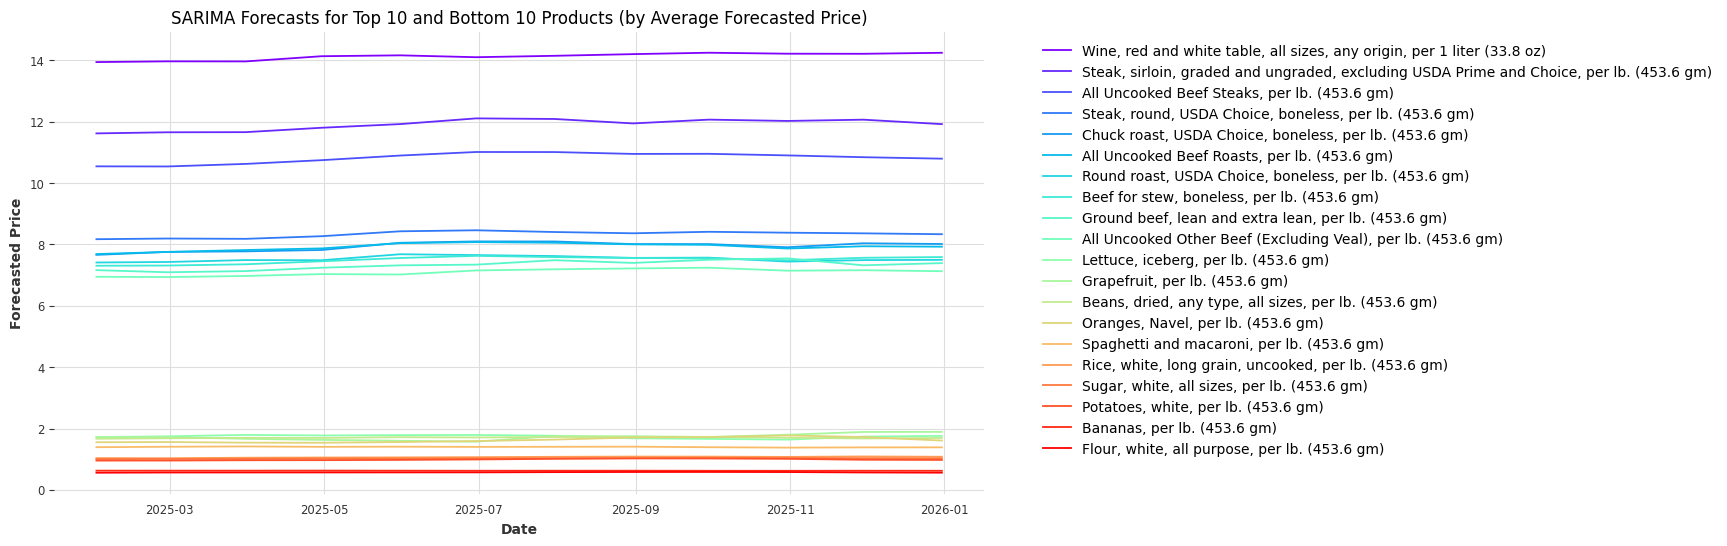

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# ... (Your existing code for loading data, fitting SARIMA,
# and storing forecasts in the 'forecasts' dictionary,
# calculating average forecasts, sorting products,
# and selecting top/bottom 10 products) ...

# Create the plot
plt.figure(figsize=(12, 6))

# Get a rainbow colormap
rainbow_cmap = cm.get_cmap('rainbow')
norm = colors.Normalize(vmin=0, vmax=len(top_10_products) + len(bottom_10_products) - 1)

# Plot top 10 forecasts
for i, product in enumerate(top_10_products):
    forecast = forecasts[product]
    plt.plot(pd.date_range(data.index[-1], periods=future_steps + 1, freq='M')[1:],
             forecast, label=product, color=rainbow_cmap(norm(i)))

# Plot bottom 10 forecasts
for i, product in enumerate(bottom_10_products):
    forecast = forecasts[product]
    plt.plot(pd.date_range(data.index[-1], periods=future_steps + 1, freq='M')[1:],
             forecast, label=product, color=rainbow_cmap(norm(i + len(top_10_products))))

# Customize the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('SARIMA Forecasts for Top 10 and Bottom 10 Products (by Average Forecasted Price)')
plt.xlabel('Date')
plt.ylabel('Forecasted Price')
plt.show()

<ipython-input-58-00fd3a6e9a32>:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  rainbow_cmap = cm.get_cmap('rainbow')
<ipython-input-58-00fd3a6e9a32>:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=future_steps + 1, freq='M')[1:],


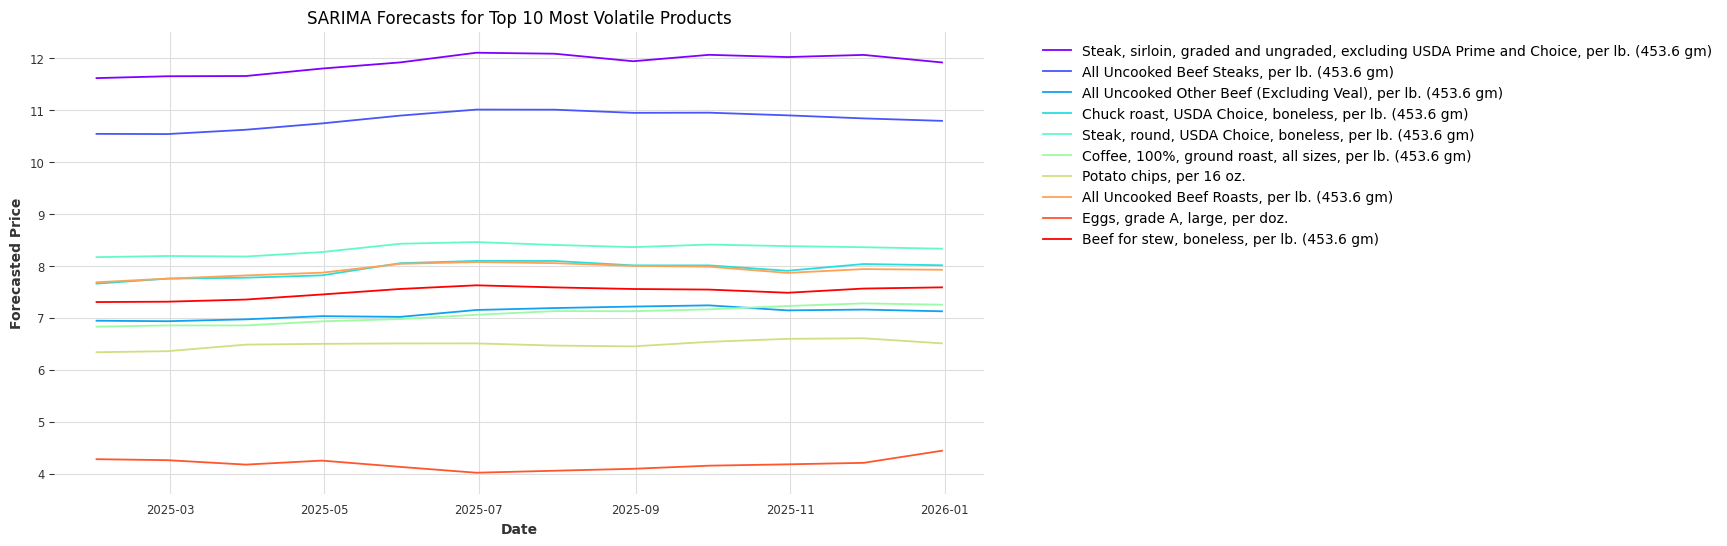

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# ... (Your existing code for loading data, fitting SARIMA,
# and storing forecasts in the 'forecasts' dictionary) ...

# Calculate volatility for each product
volatilities = {}
for product_col in df.columns:
    if product_col != 'year_month':
        data = df[[product_col]].dropna()
        volatilities[product_col] = np.std(data[product_col])

# Sort products by volatility in descending order
sorted_volatilities = dict(sorted(volatilities.items(), key=lambda item: item[1], reverse=True))

# Select the top 10 most volatile products
top_10_volatile_products = list(sorted_volatilities.keys())[:10]

# Create the plot
plt.figure(figsize=(12, 6))

# Get a rainbow colormap
rainbow_cmap = cm.get_cmap('rainbow')
norm = colors.Normalize(vmin=0, vmax=len(top_10_volatile_products) - 1)

# Plot forecasts for the top 10 volatile products
for i, product in enumerate(top_10_volatile_products):
    forecast = forecasts[product]
    plt.plot(pd.date_range(data.index[-1], periods=future_steps + 1, freq='M')[1:],
             forecast, label=product, color=rainbow_cmap(norm(i)))


# Customize the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('SARIMA Forecasts for Top 10 Most Volatile Products')
plt.xlabel('Date')
plt.ylabel('Forecasted Price')
plt.show()

show how each component (trend, seasonality) contributes to the model's forecasts for that specific product.

<ipython-input-59-04943b9c645a>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  axes[i].plot(pd.date_range(data.index[-1], periods=future_steps + 1, freq='M')[1:], forecast, label='Forecast', linestyle='dashed')
<ipython-input-59-04943b9c645a>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.xlim([df.index.min(), pd.date_range(df.index[-1], periods=future_steps+1, freq='M')[-1]])


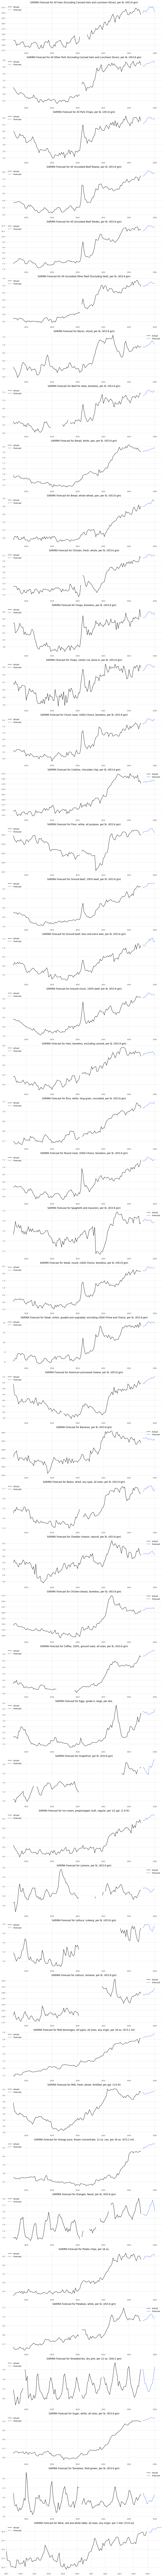

In [ ]:
num_products = len(forecasts)
fig, axes = plt.subplots(nrows=num_products, ncols=1, figsize=(12, num_products * 4))

for i, (product_col, forecast) in enumerate(forecasts.items()):
    axes[i].plot(data.index, df[product_col], label='Actual')
    axes[i].plot(pd.date_range(data.index[-1], periods=future_steps + 1, freq='M')[1:], forecast, label='Forecast', linestyle='dashed')
    axes[i].legend()
    axes[i].set_title(f'SARIMA Forecast for {product_col}')
    plt.xlim([df.index.min(), pd.date_range(df.index[-1], periods=future_steps+1, freq='M')[-1]])

plt.tight_layout()
plt.show()

<ipython-input-67-24e7a5aabf11>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  rainbow_cmap = cm.get_cmap('rainbow')  # Use 'rainbow' colormap
<ipython-input-67-24e7a5aabf11>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=future_steps + 1, freq='M')[1:],


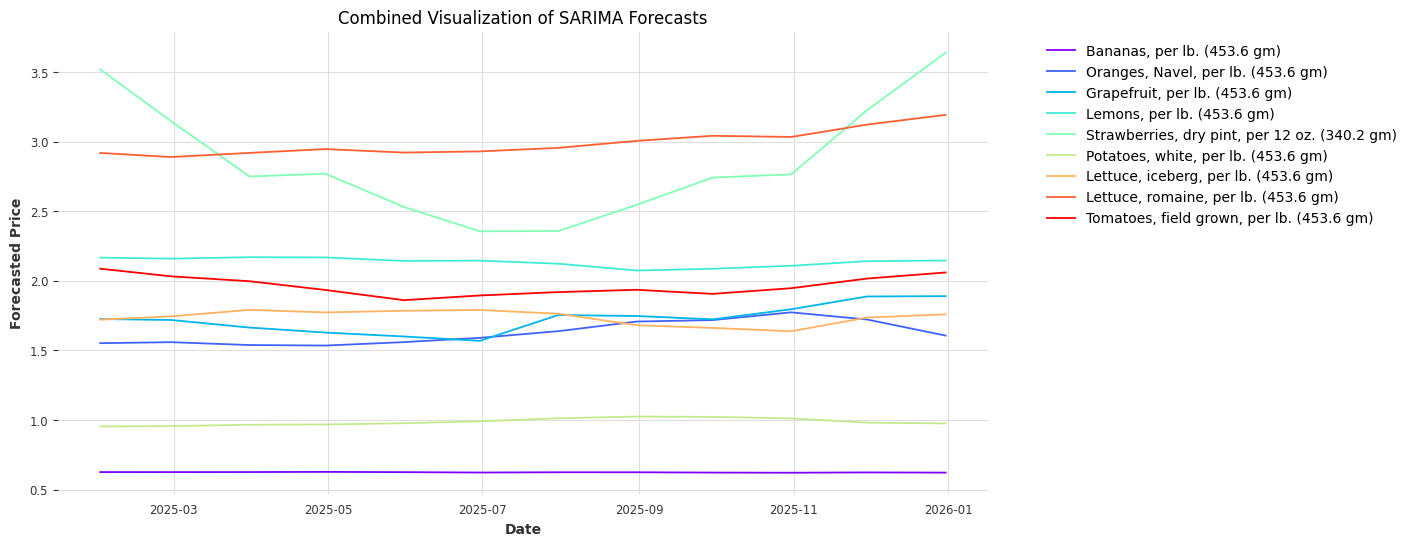

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ... (Your existing code to load data, fit SARIMA, and store forecasts in 'forecasts' dictionary) ...

# Specify the products to visualize together
products_to_visualize = ["Bananas, per lb. (453.6 gm)", "Oranges, Navel, per lb. (453.6 gm)", "Grapefruit, per lb. (453.6 gm)", "Lemons, per lb. (453.6 gm)", "Strawberries, dry pint, per 12 oz. (340.2 gm)", "Potatoes, white, per lb. (453.6 gm)", "Lettuce, iceberg, per lb. (453.6 gm)","Lettuce, romaine, per lb. (453.6 gm)","Tomatoes, field grown, per lb. (453.6 gm)"]

# Create the plot
plt.figure(figsize=(12, 6))


# Get a colormap (e.g., 'viridis', 'plasma', 'tab20', etc.)
rainbow_cmap = cm.get_cmap('rainbow')  # Use 'rainbow' colormap
# Create a color normalizer
norm = colors.Normalize(vmin=0, vmax=len(products_to_visualize) - 1)

# Plot forecasts for each specified product with differentiated colors
for i, product in enumerate(products_to_visualize):
    forecast = forecasts[product]
    plt.plot(pd.date_range(data.index[-1], periods=future_steps + 1, freq='M')[1:],
             forecast, label=product, color=rainbow_cmap(norm(i)))  # Assign color using colormap

# Customize the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position if needed
plt.title('Combined Visualization of SARIMA Forecasts')
plt.xlabel('Date')
plt.ylabel('Forecasted Price')
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_dx438dn/xh2q2ldy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_dx438dn/94qvshru.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18223', 'data', 'file=/tmp/tmp_dx438dn/xh2q2ldy.json', 'init=/tmp/tmp_dx438dn/94qvshru.json', 'output', 'file=/tmp/tmp_dx438dn/prophet_modeloh6ere95/prophet_model-20250324011400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:14:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:14:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

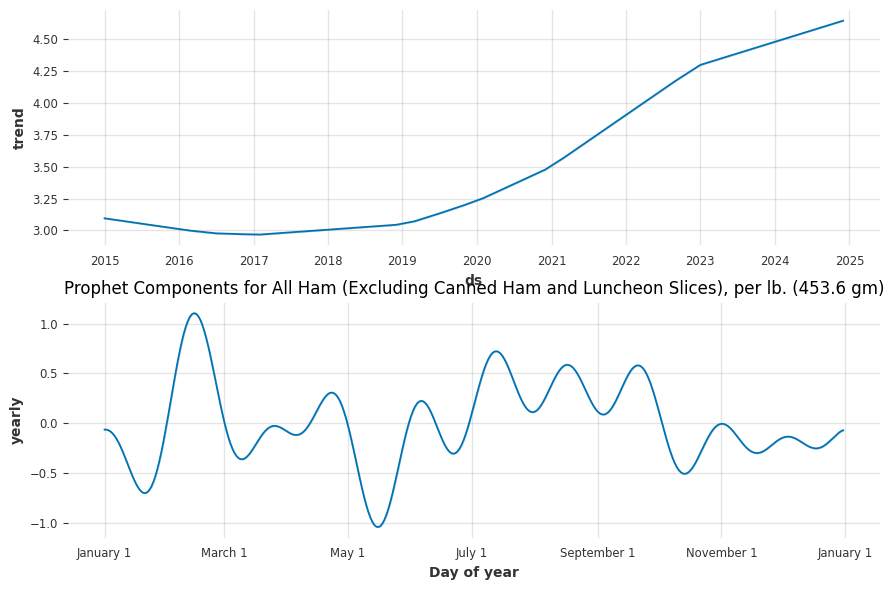

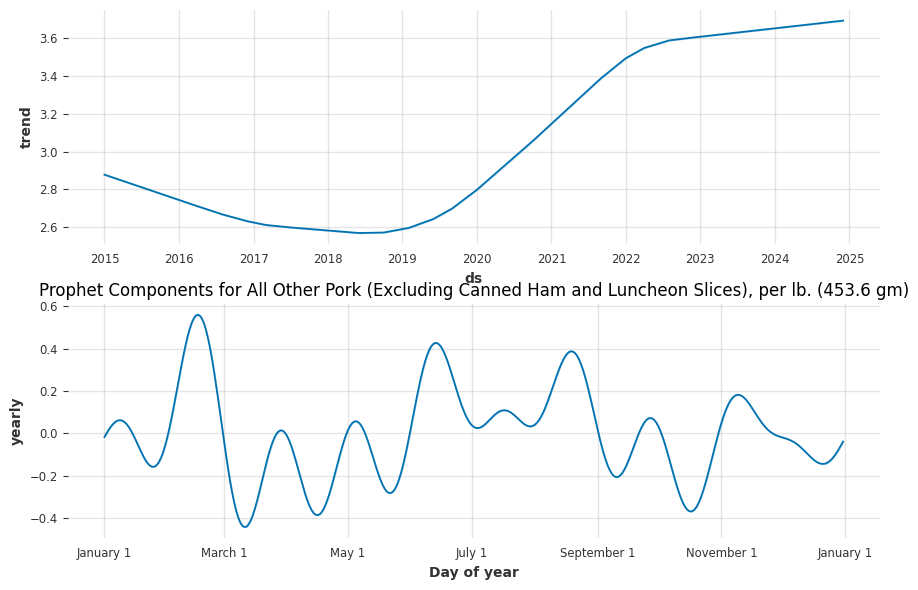

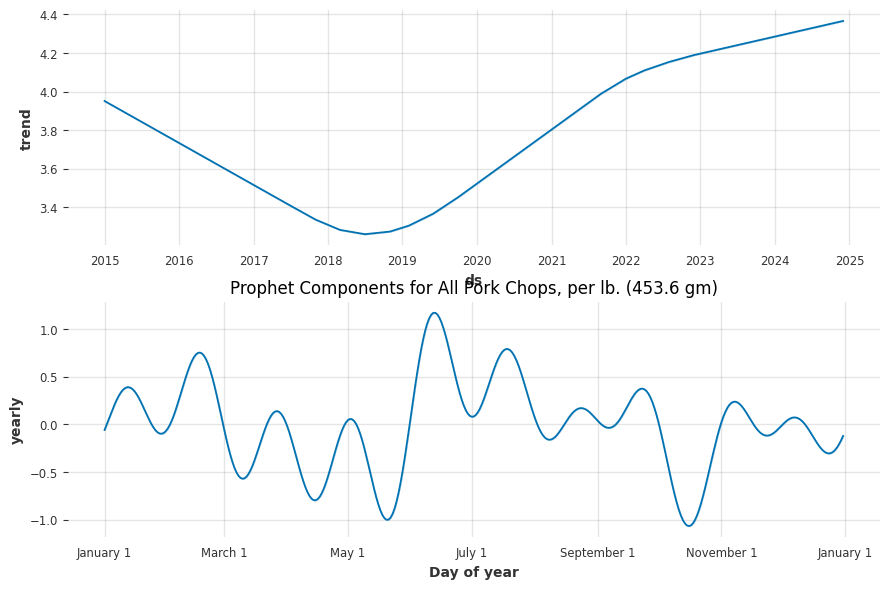

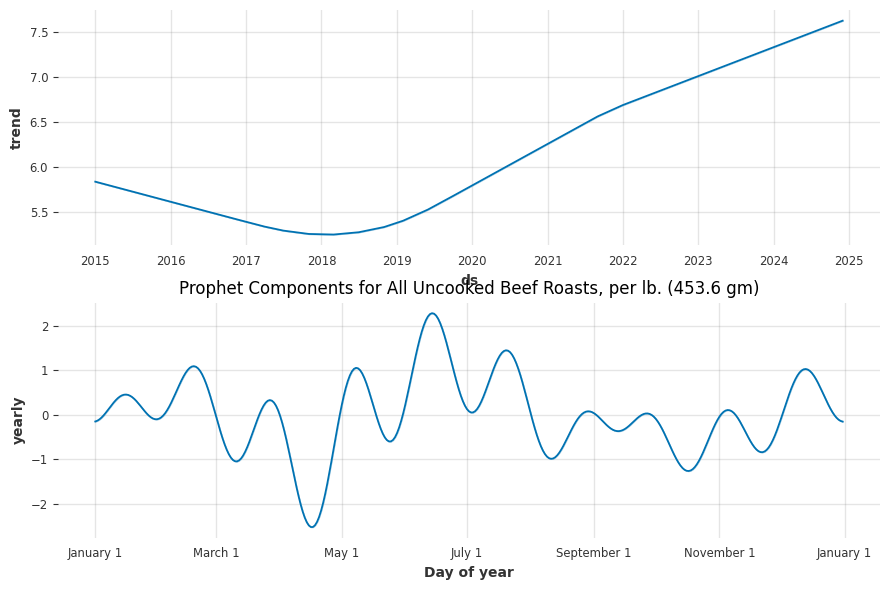

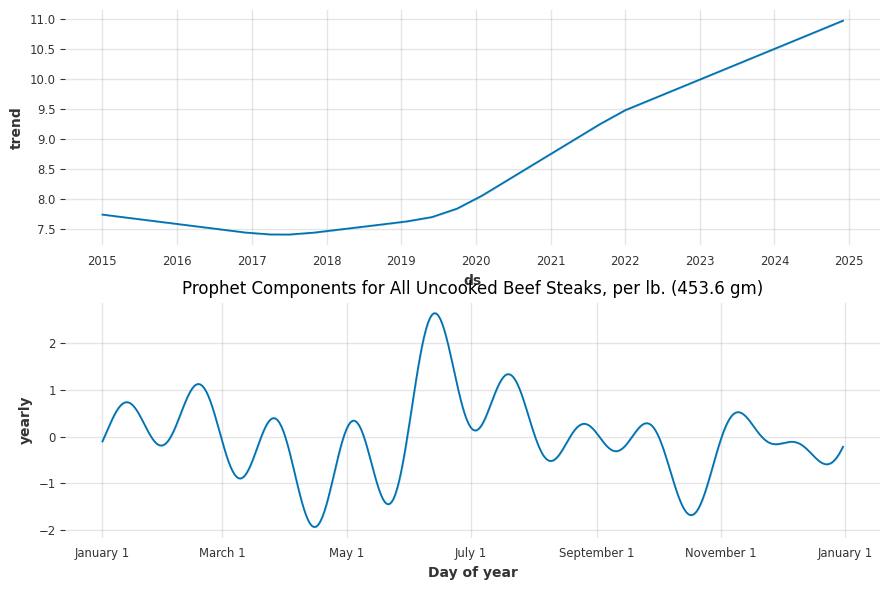

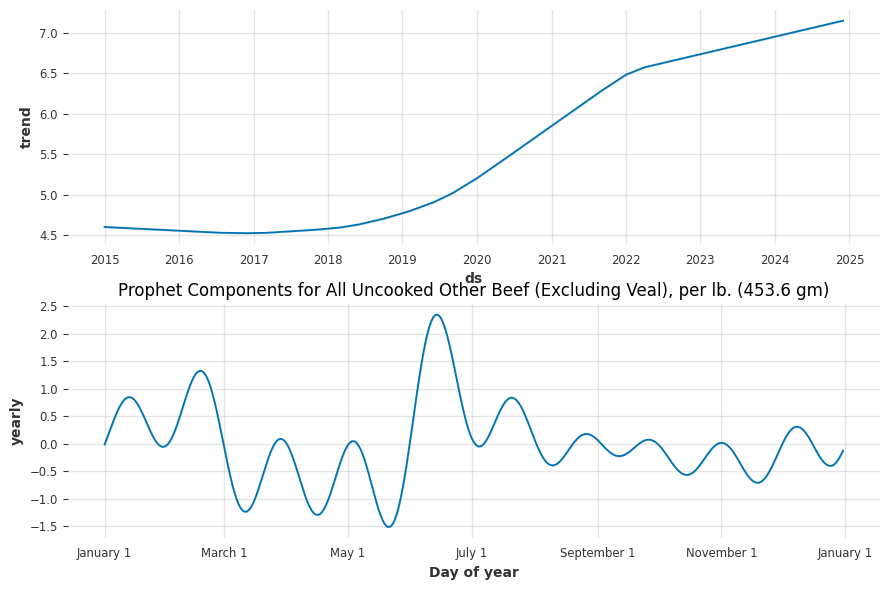

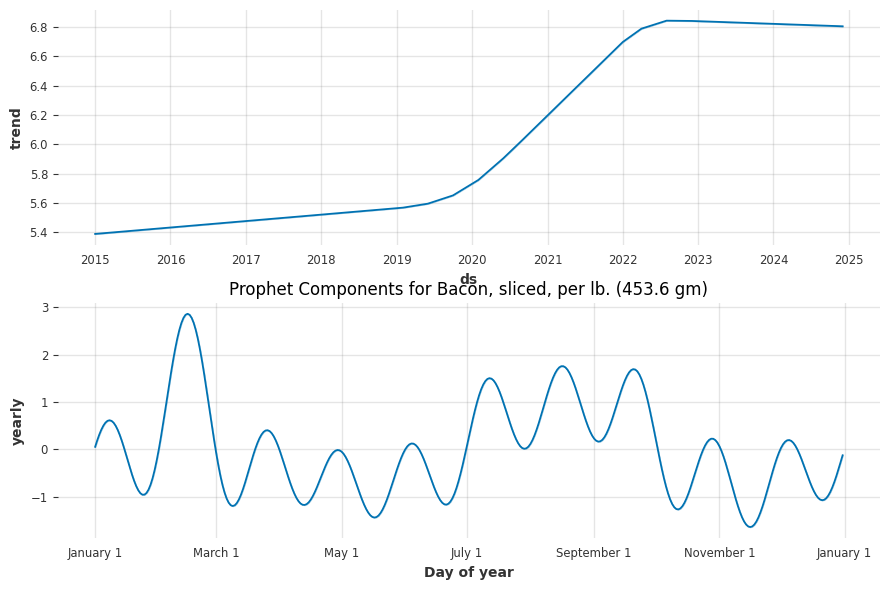

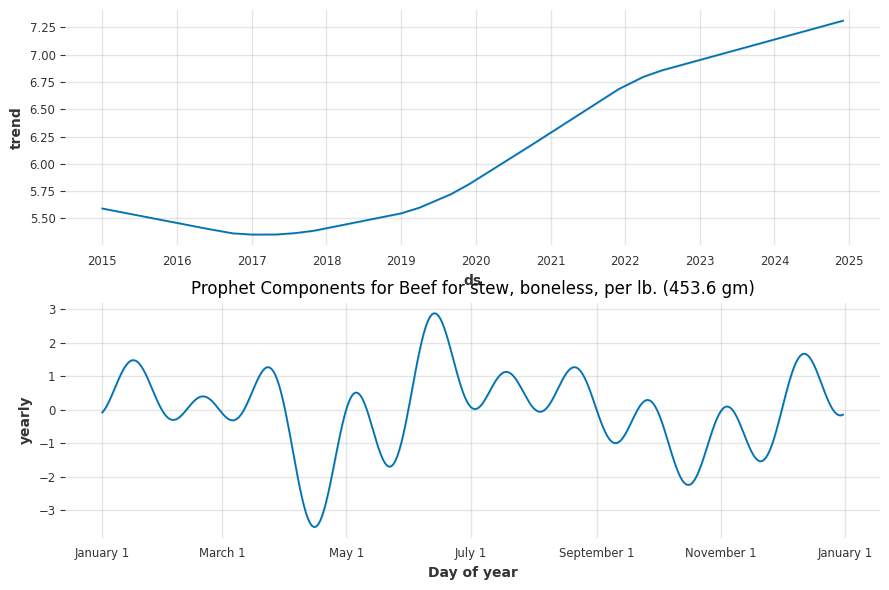

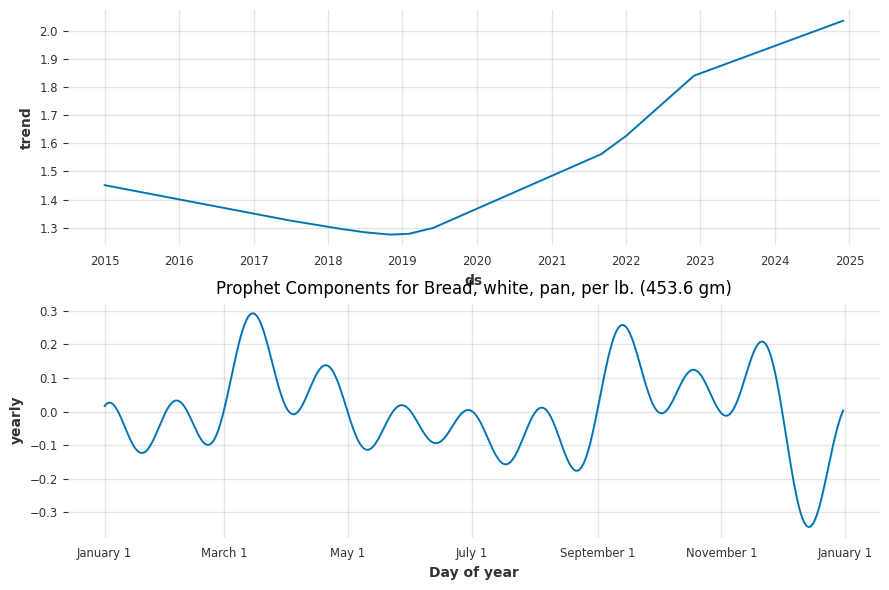

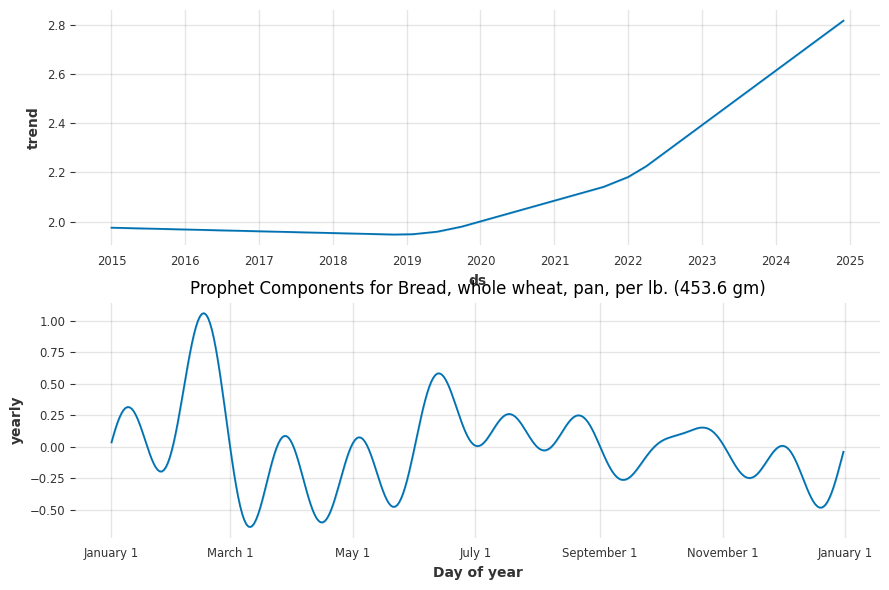

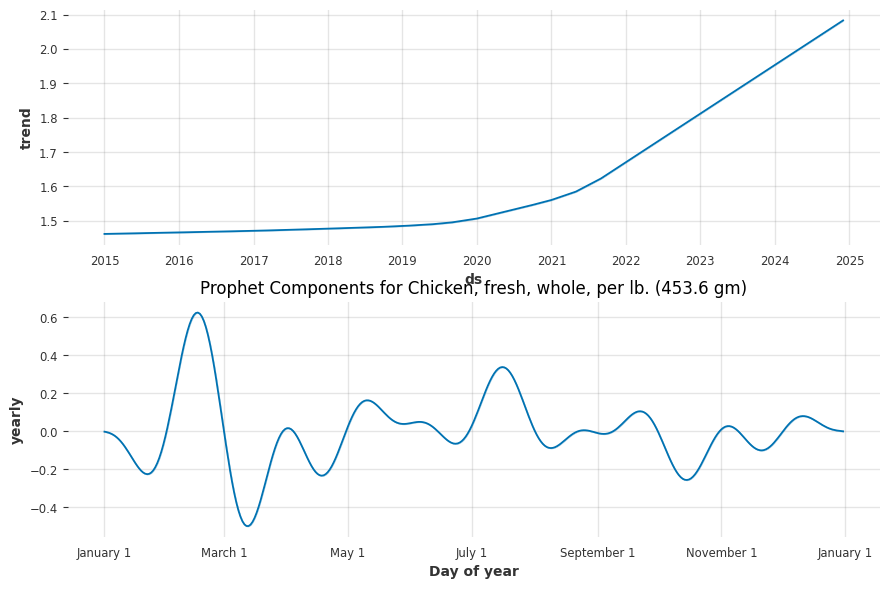

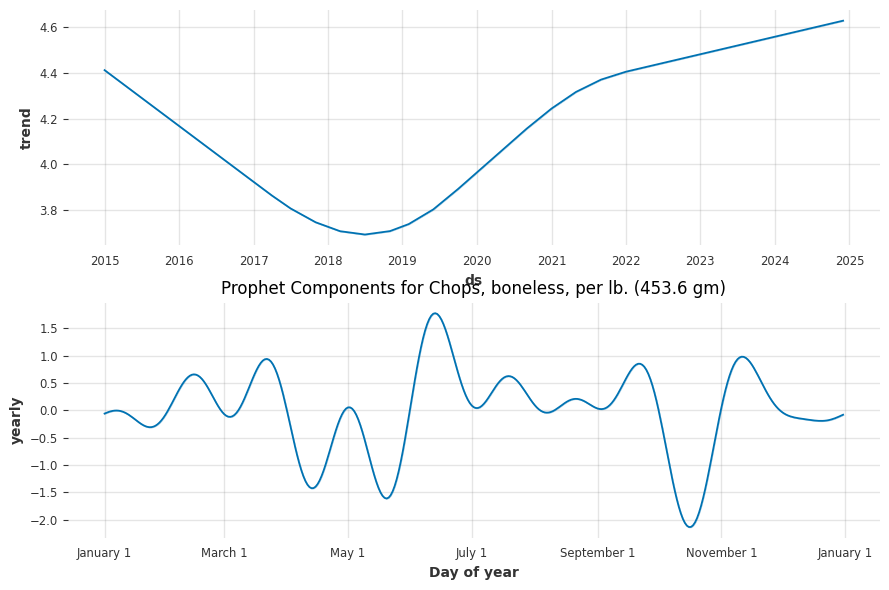

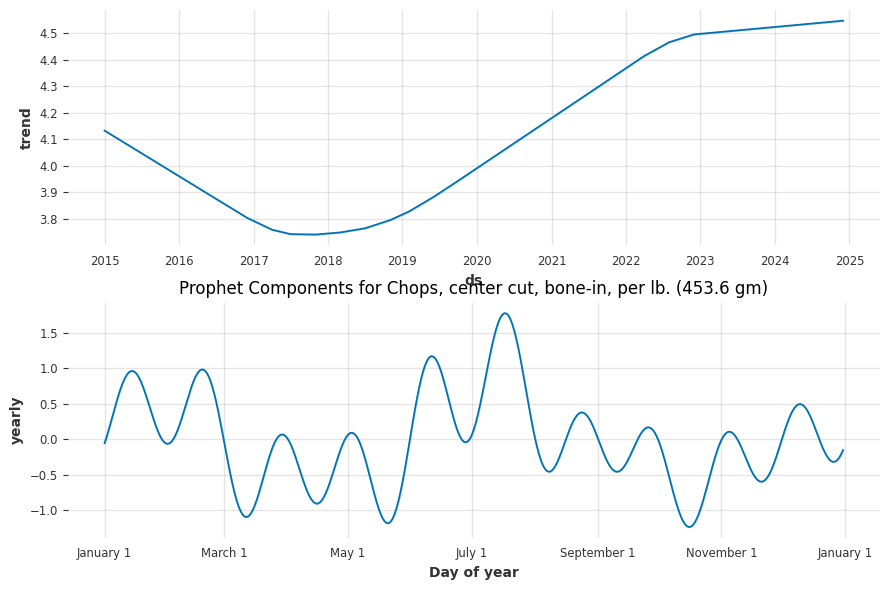

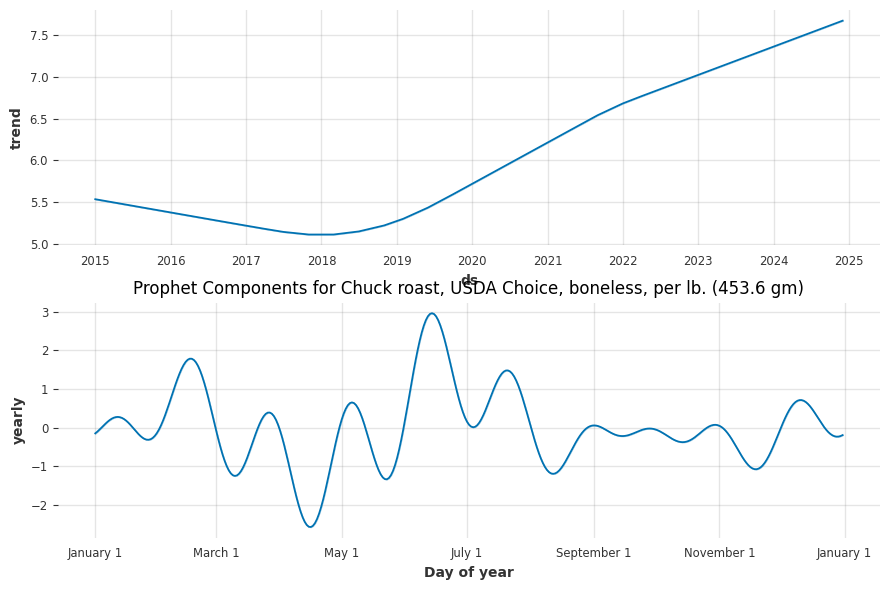

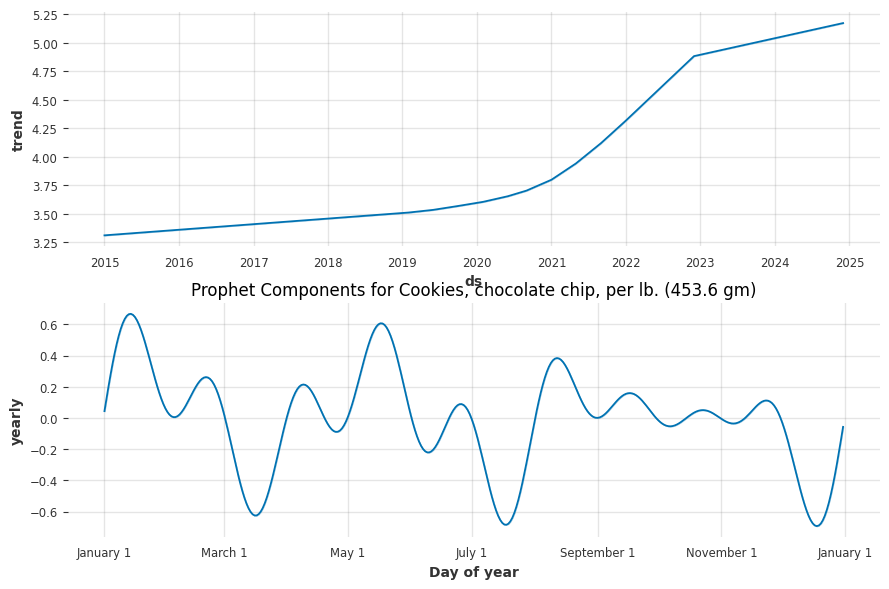

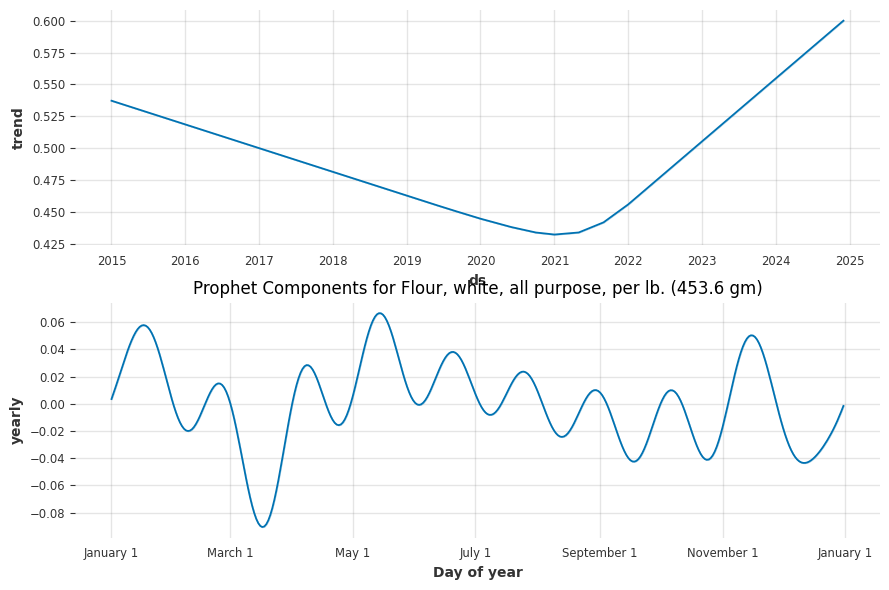

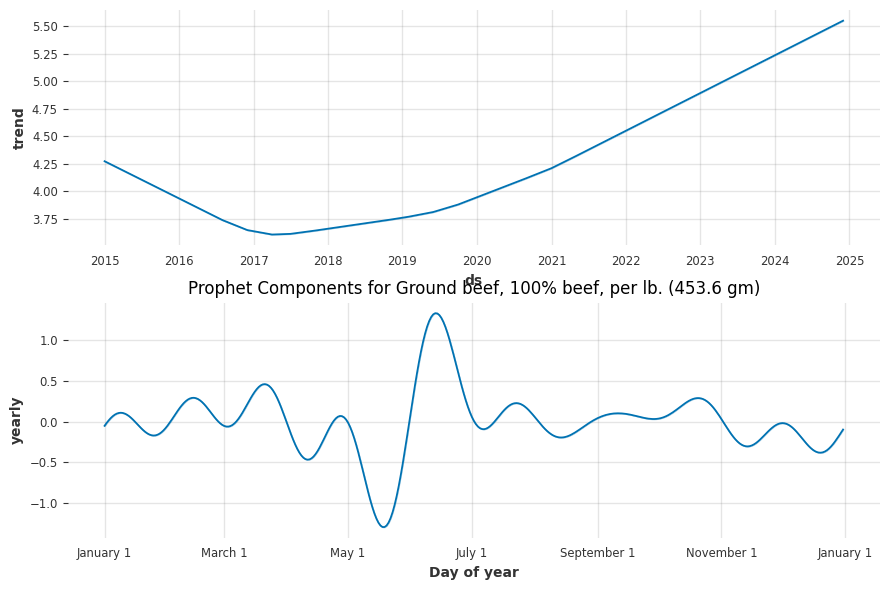

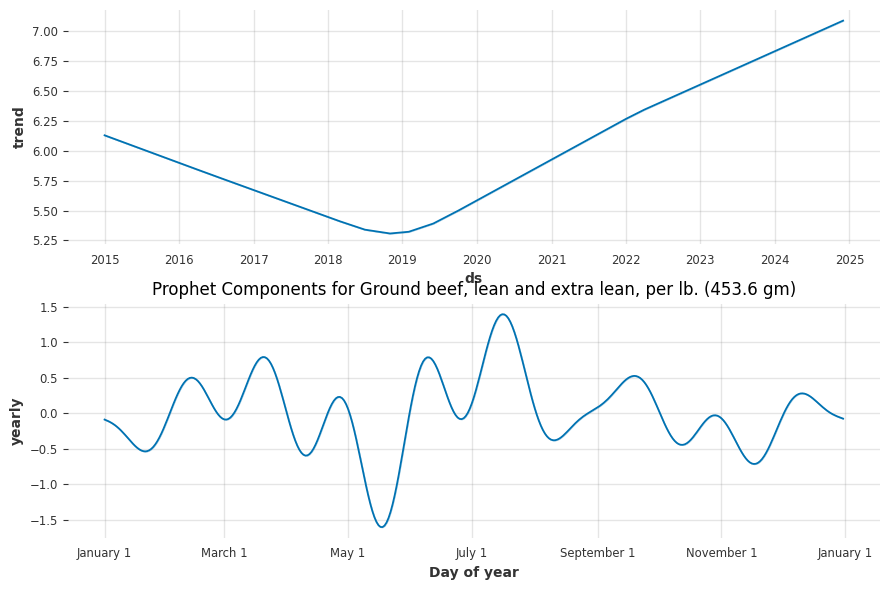

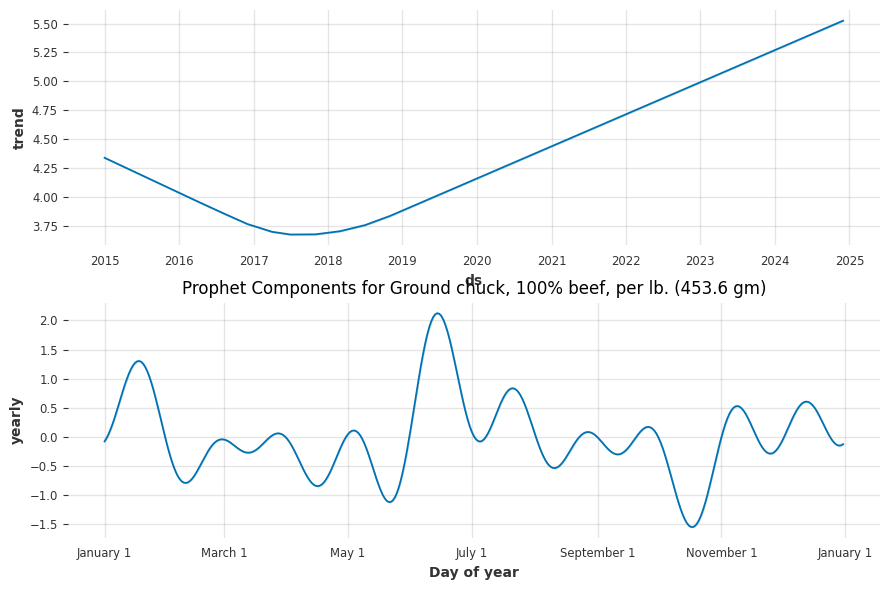

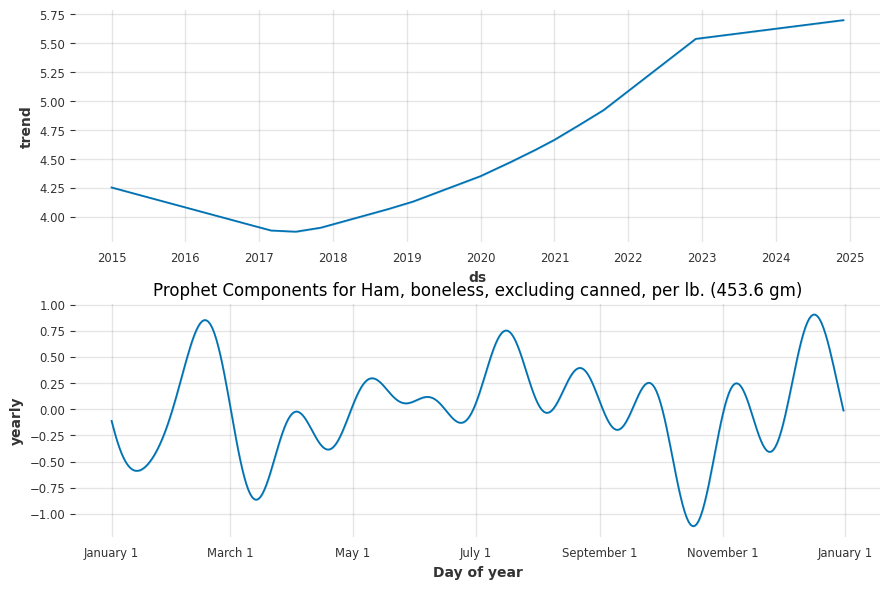

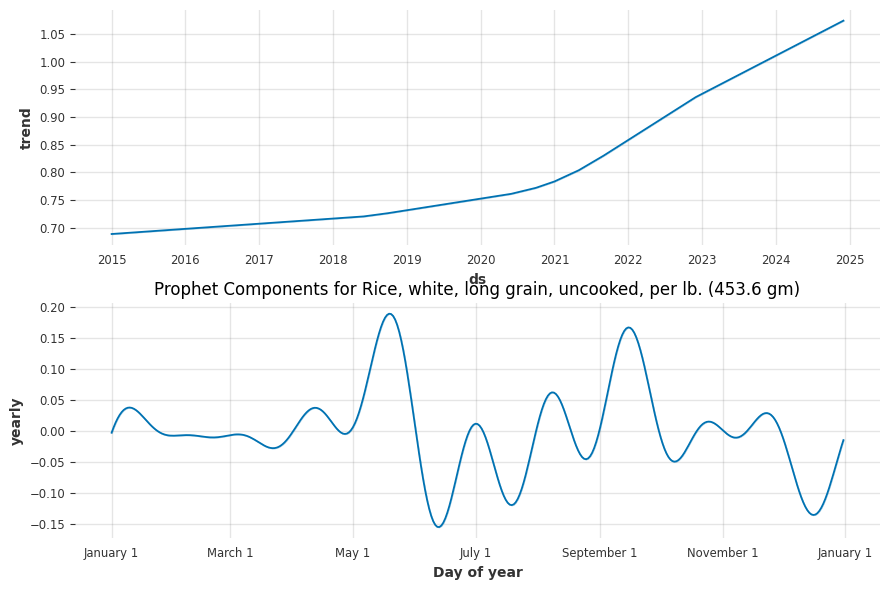

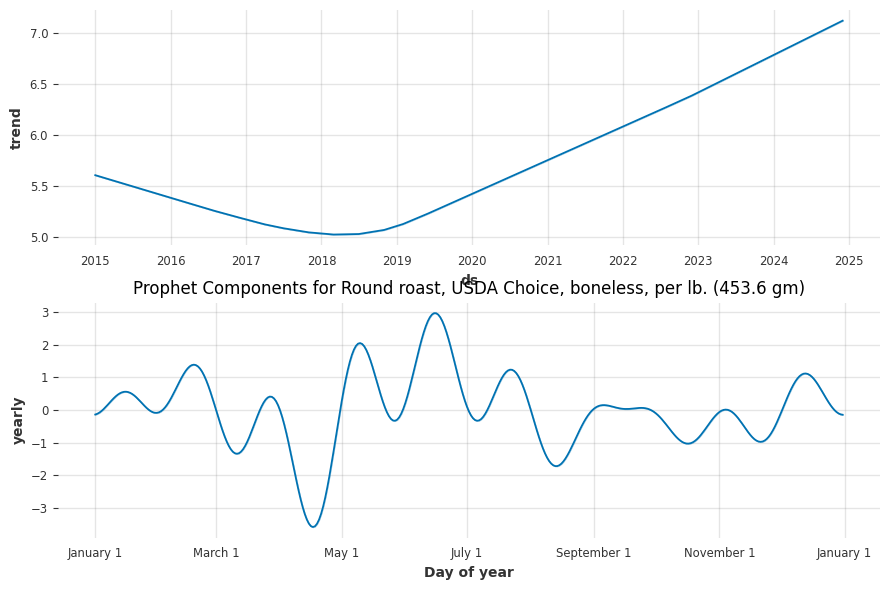

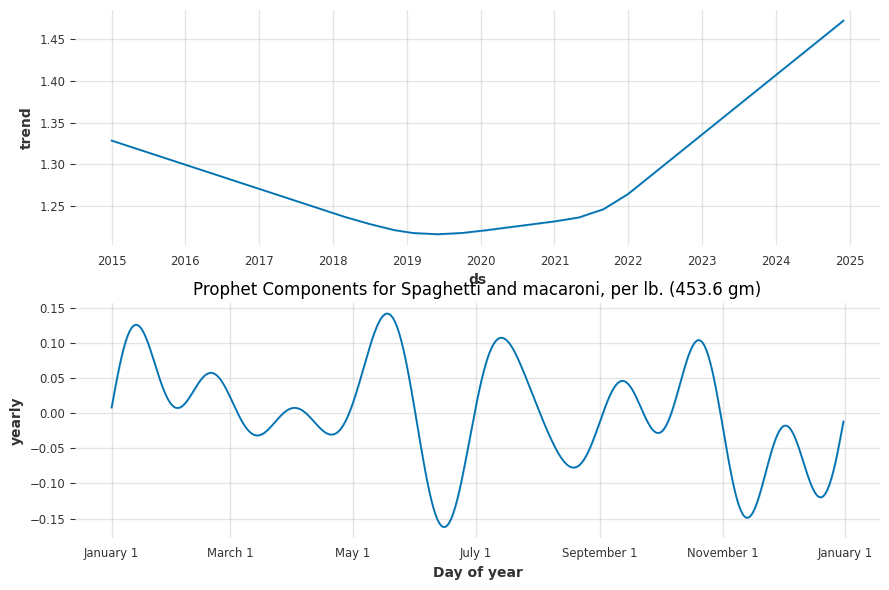

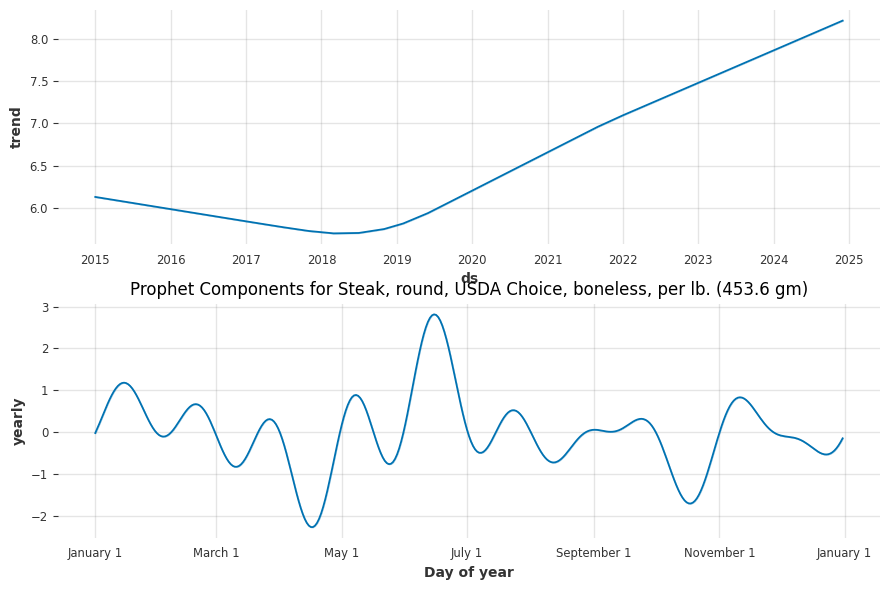

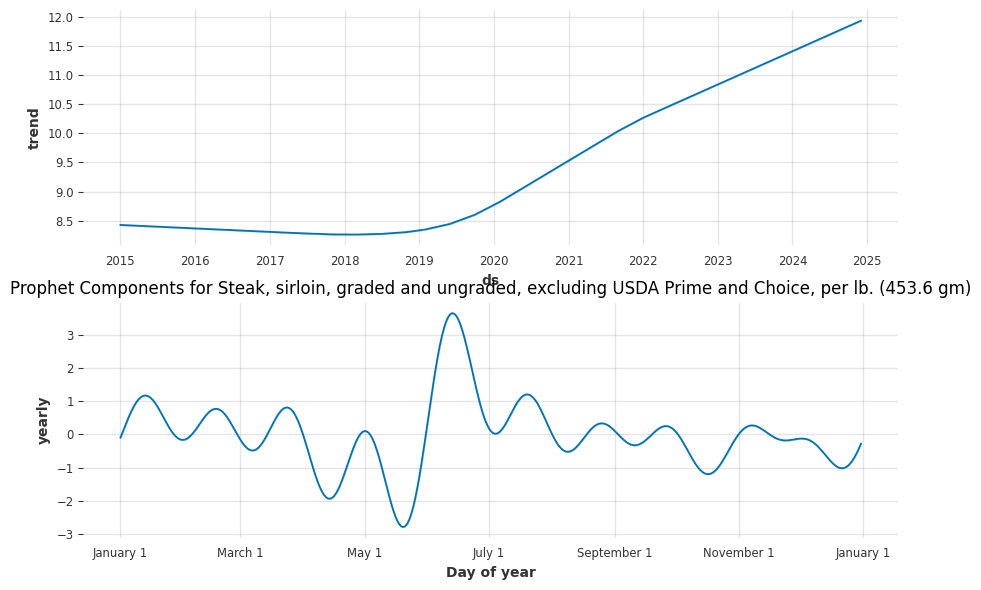

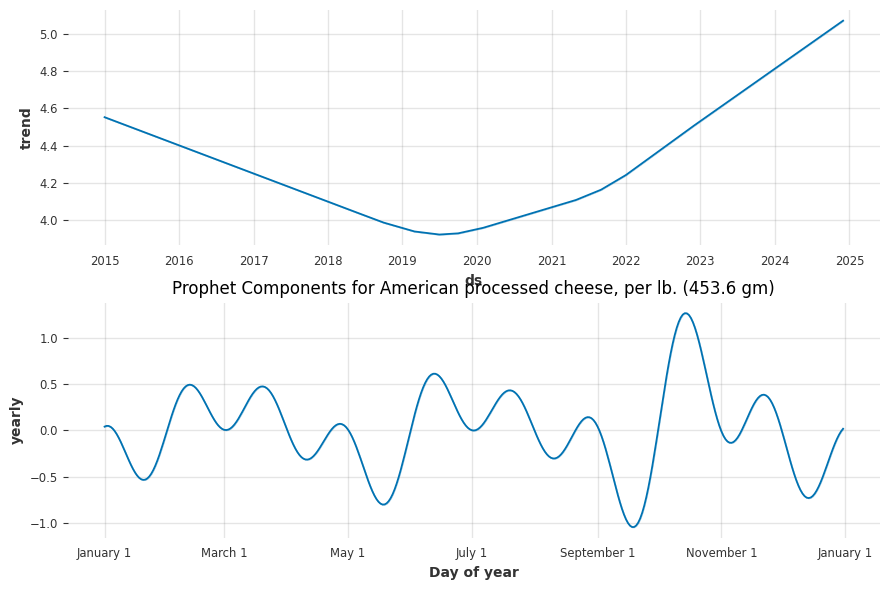

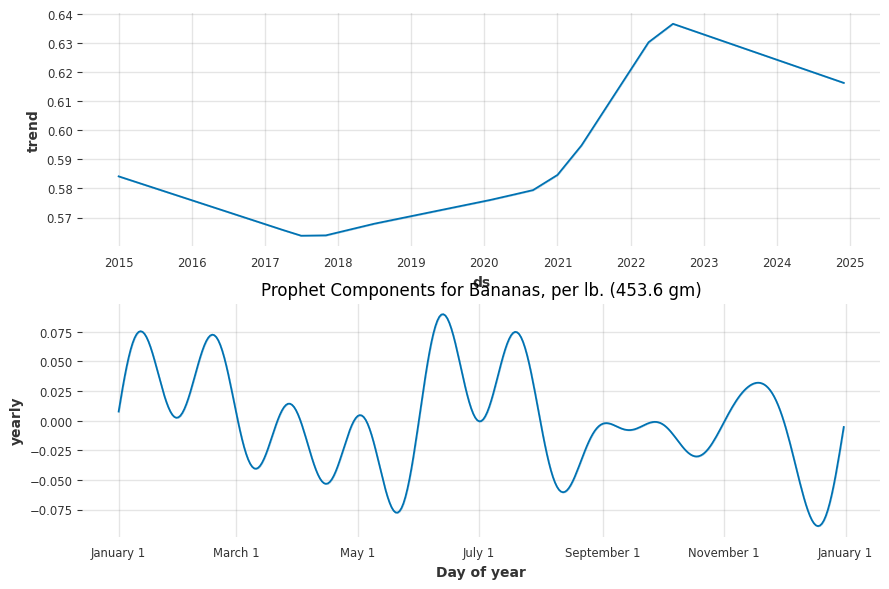

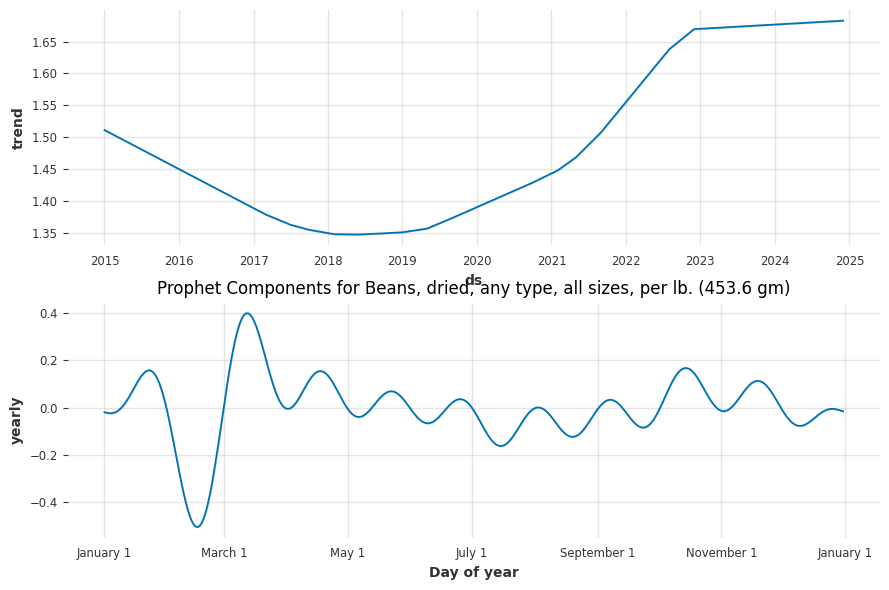

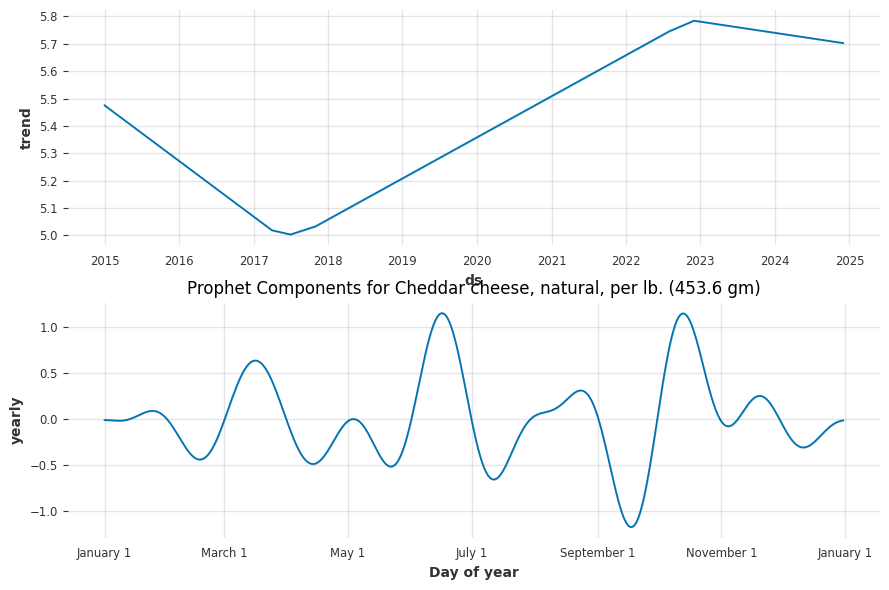

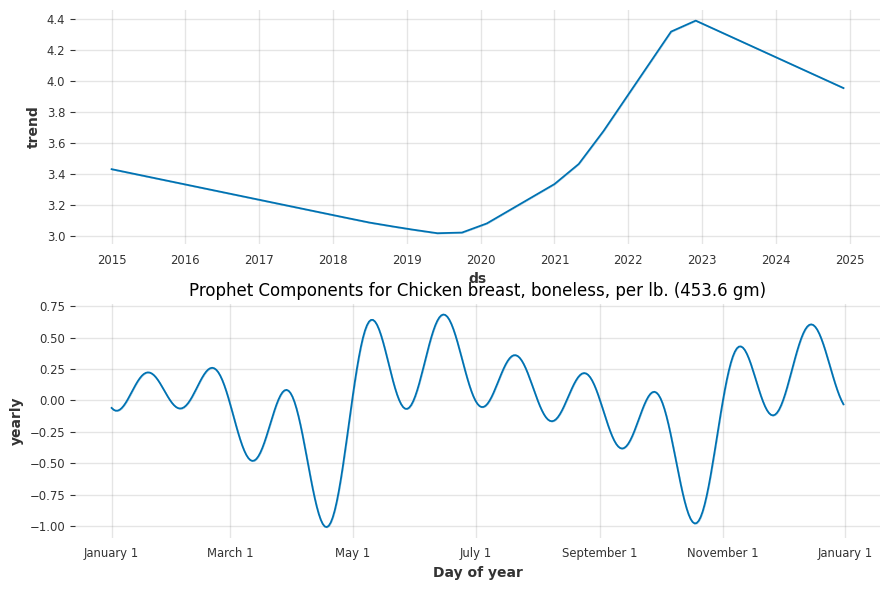

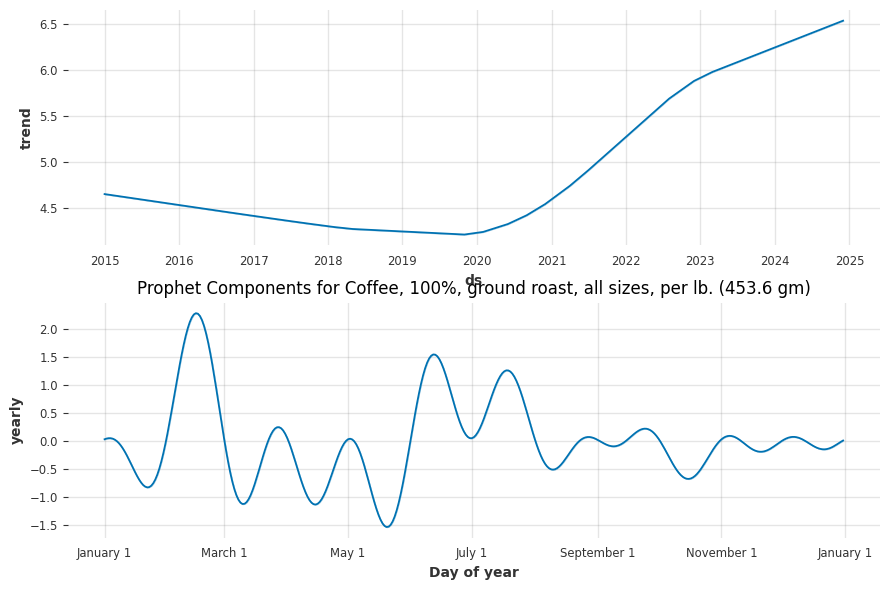

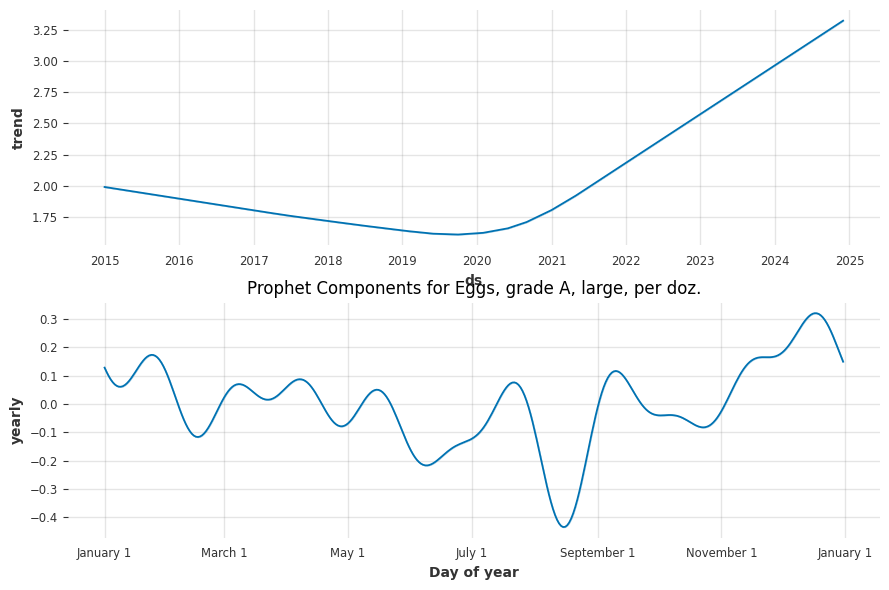

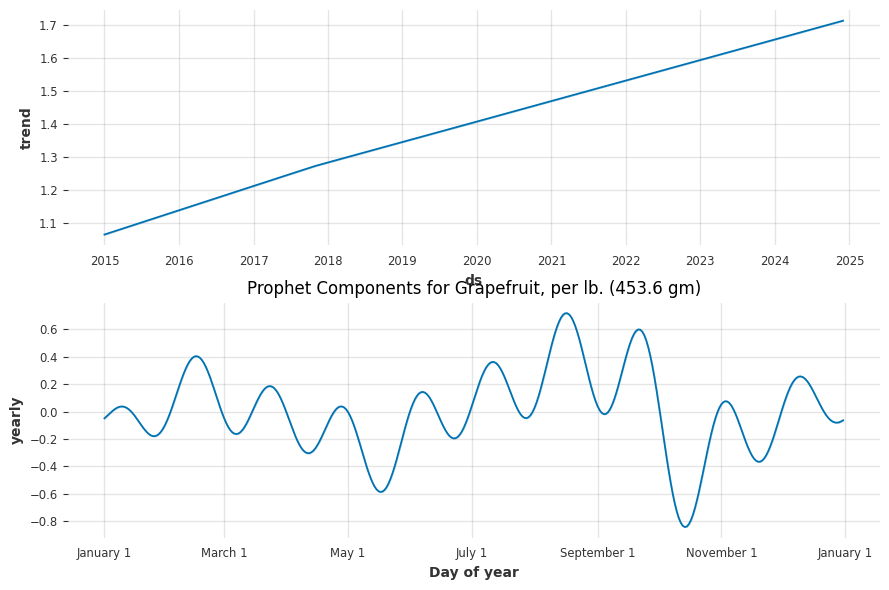

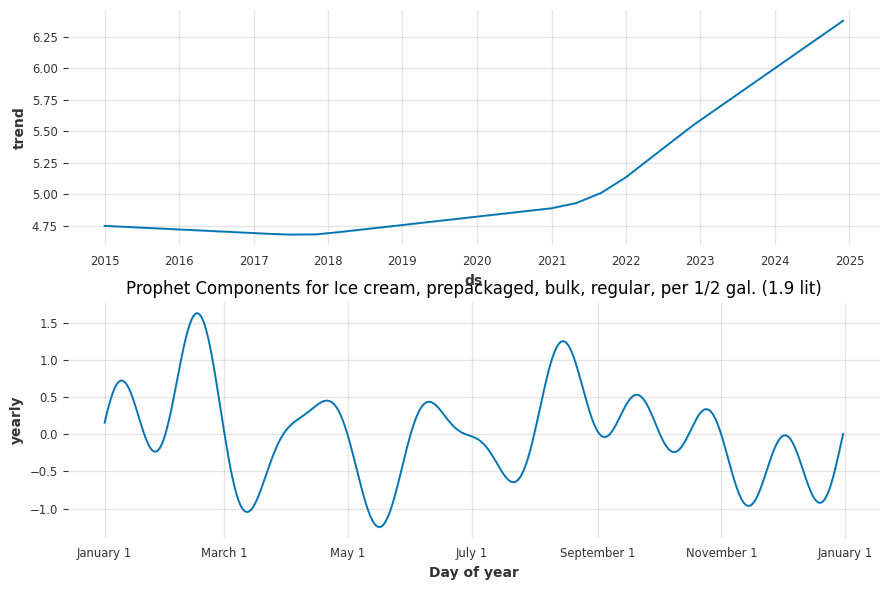

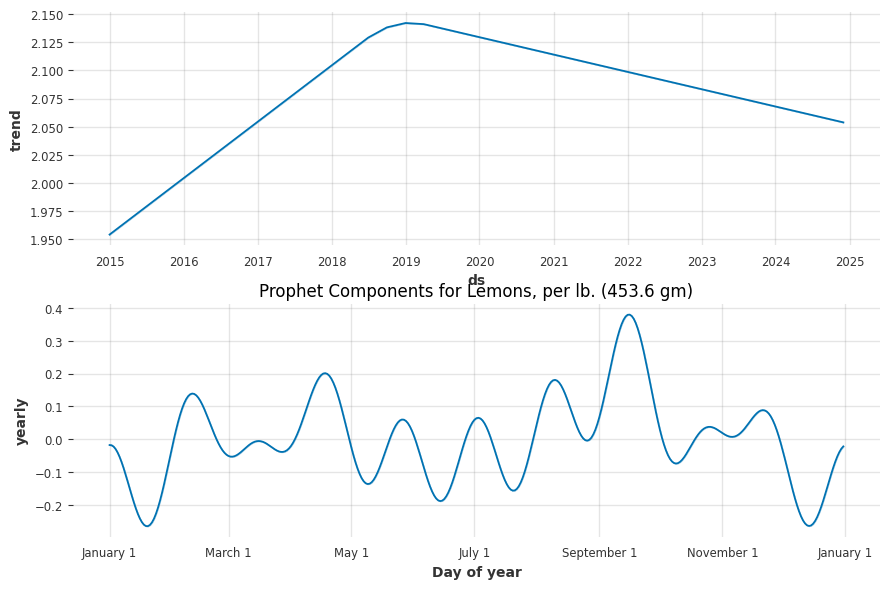

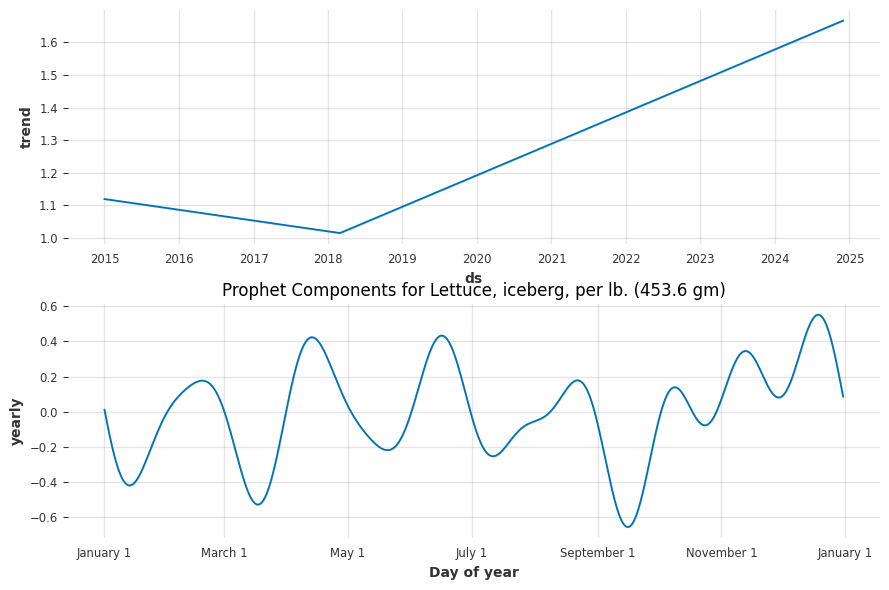

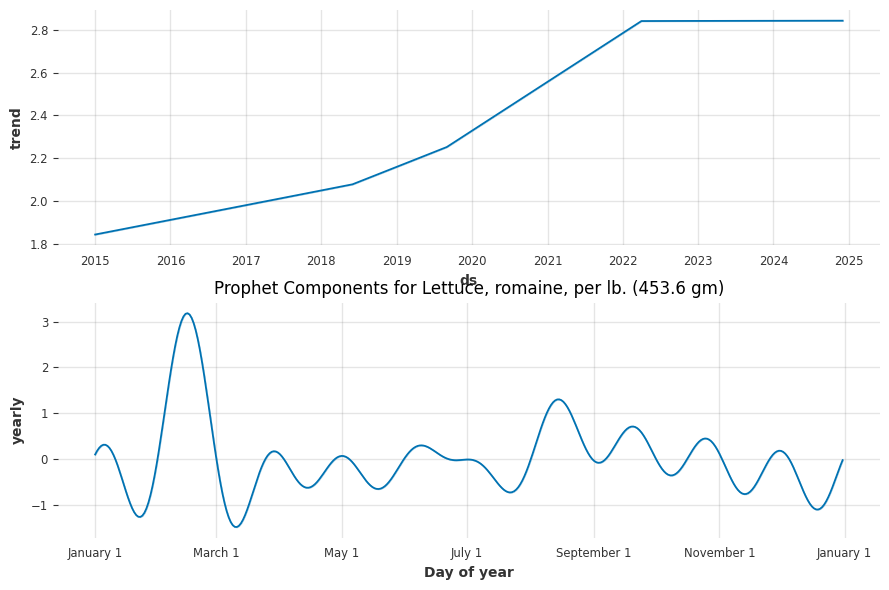

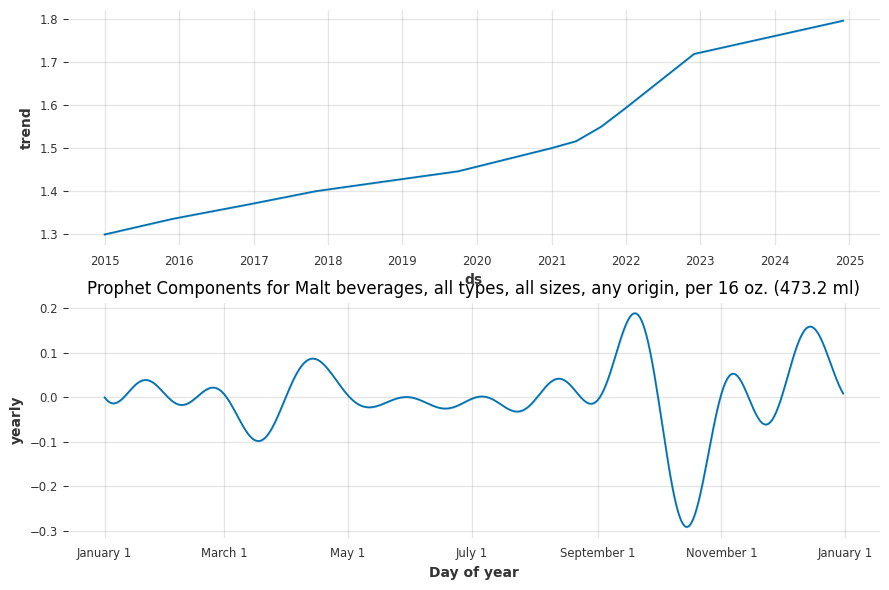

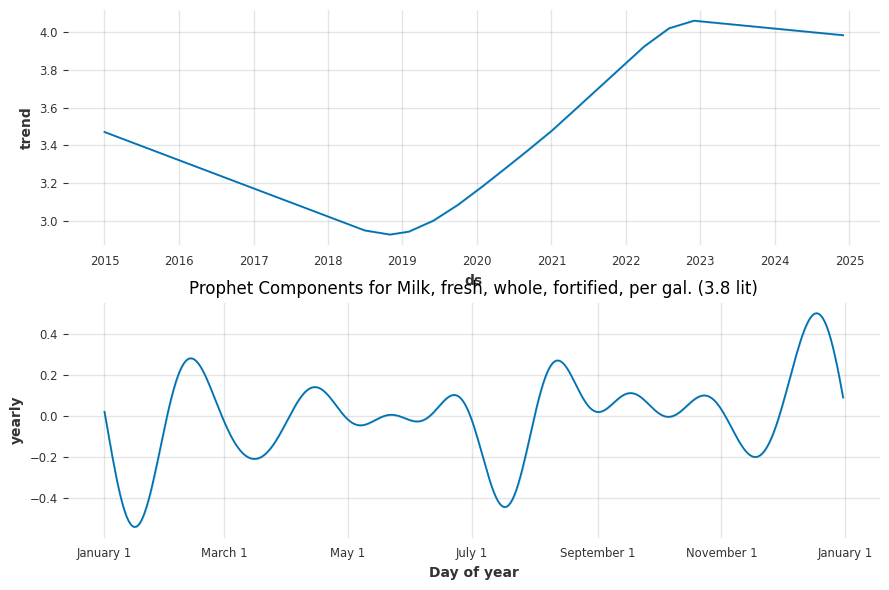

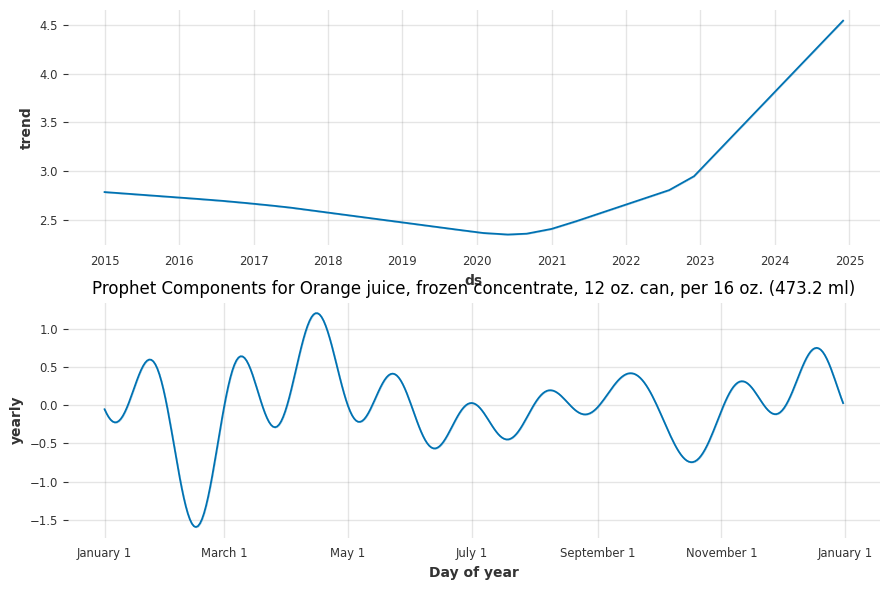

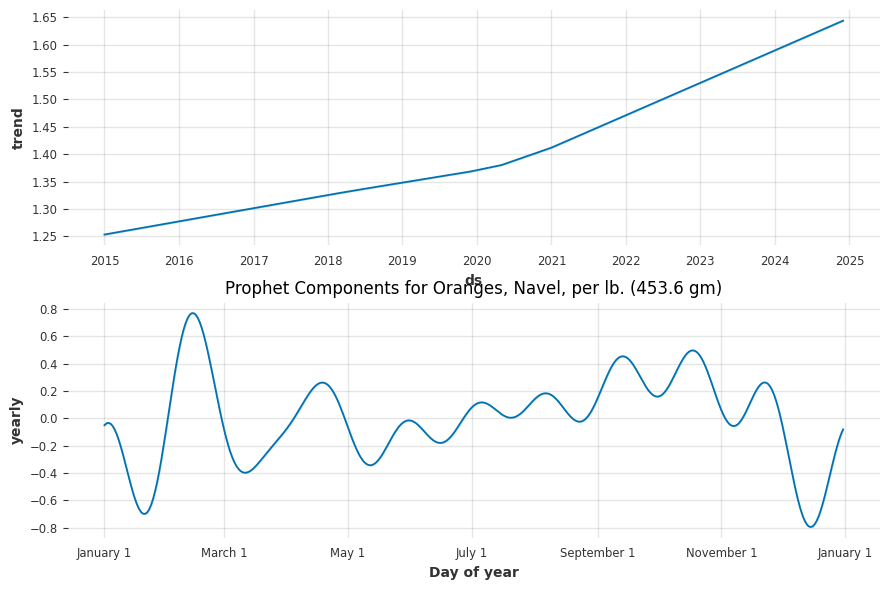

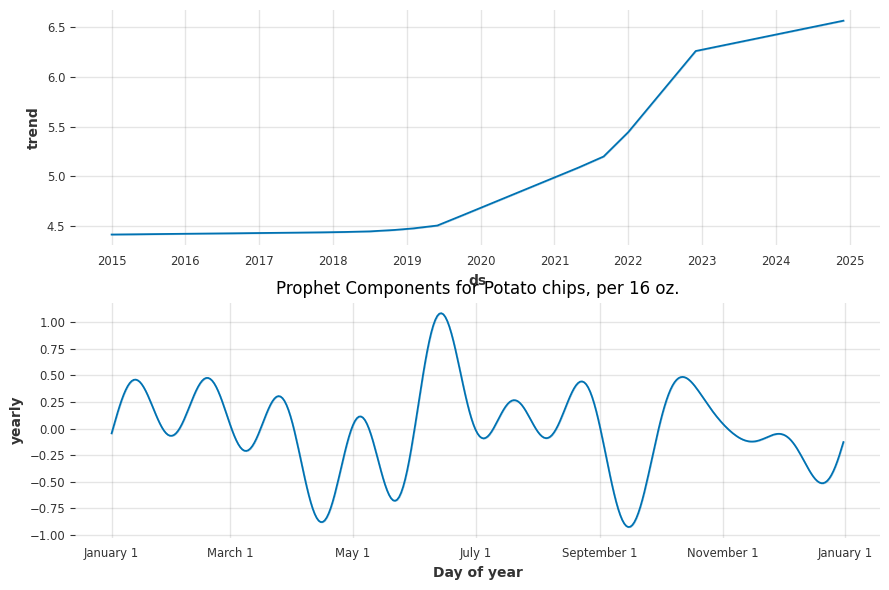

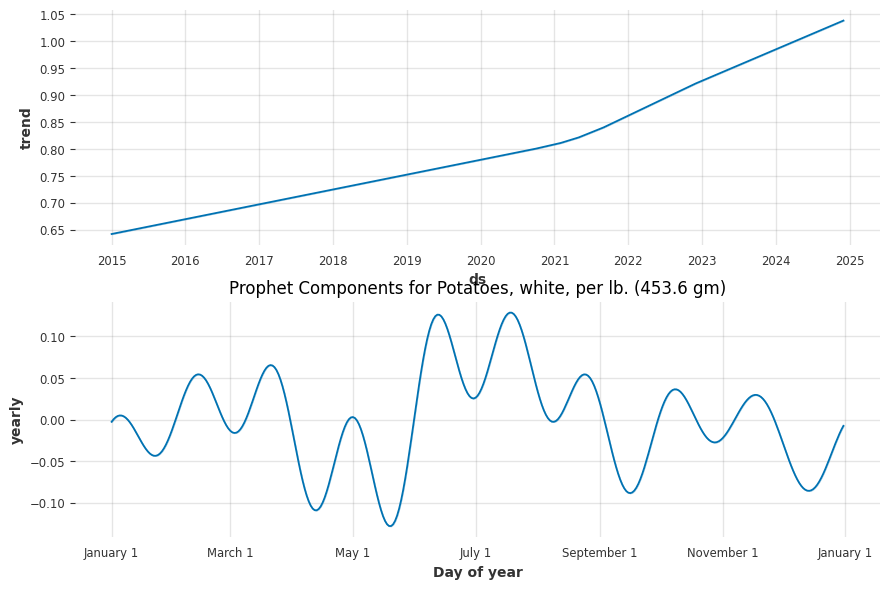

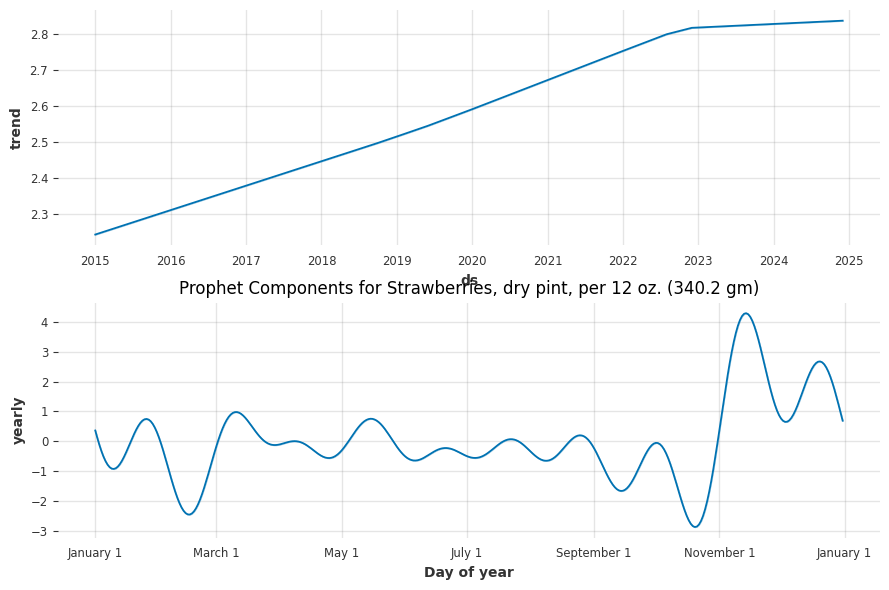

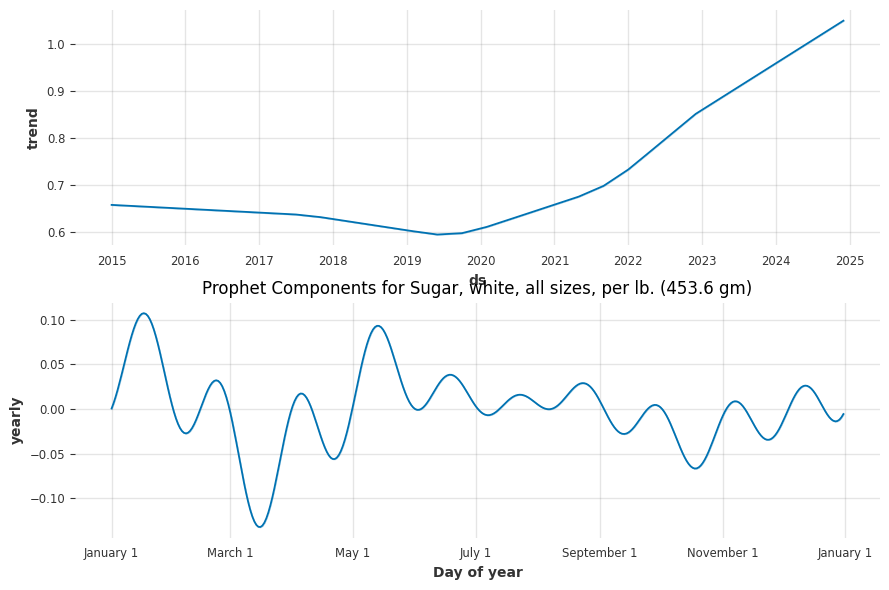

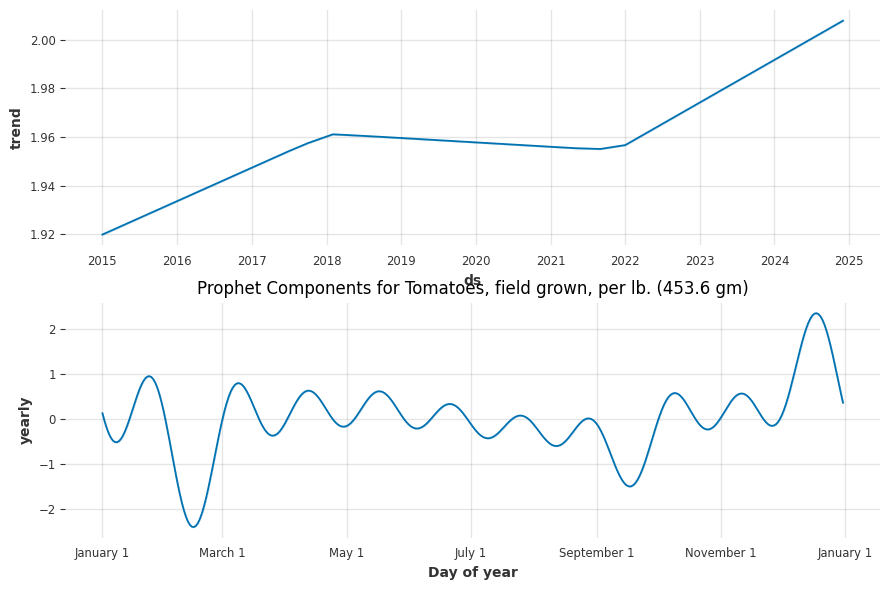

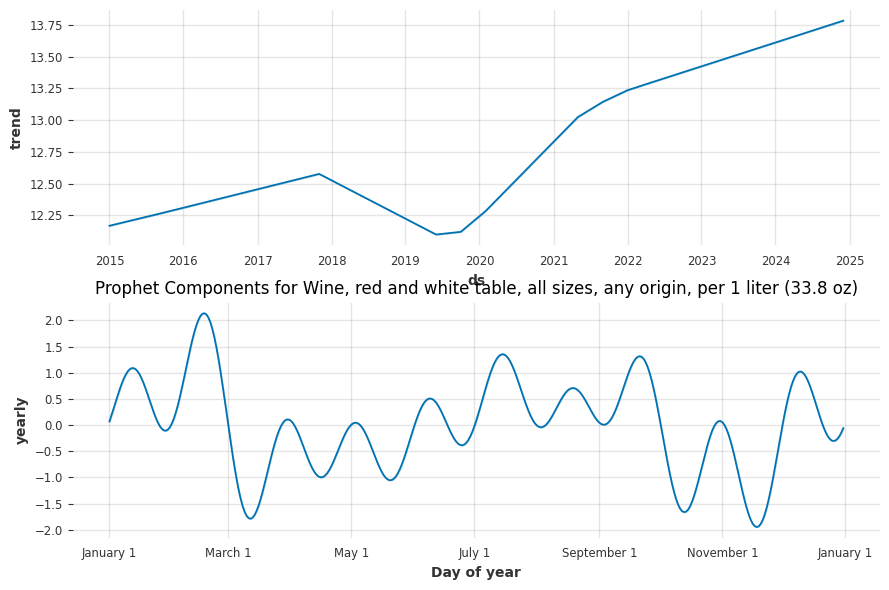

In [ ]:
# prompt: make more prophet visualizations for other items in the df

import matplotlib.pyplot as plt
# ... (Load and prepare data as before) ...

# Store Prophet model components in a dictionary for visualization
prophet_components = {}

# Iterate through columns (excluding 'year_month' if it's still present)
for product_col in df.columns:
    if product_col != 'year_month':  # Skip 'year_month' if it's still a column
        data = df[[product_col]].dropna()

        # Prepare data for Prophet
        prophet_df = data.reset_index()
        prophet_df.columns = ['ds', 'y']

        # Create and fit Prophet model
        model = Prophet()
        model.fit(prophet_df)

        # Create future dataframe for forecasting
        future = model.make_future_dataframe(periods=future_steps)

        # Make forecast
        forecast = model.predict(future)

        # Store Prophet model components in the dictionary
        prophet_components[product_col] = model

for product_col, model in prophet_components.items():
    fig = model.plot_components(model.predict(model.make_future_dataframe(periods=0)))
    plt.title(f'Prophet Components for {product_col}')
    plt.show()


<ipython-input-20-1c99bc1091d1>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(data.index[-1], periods=future_steps + 1, freq='M')[1:]


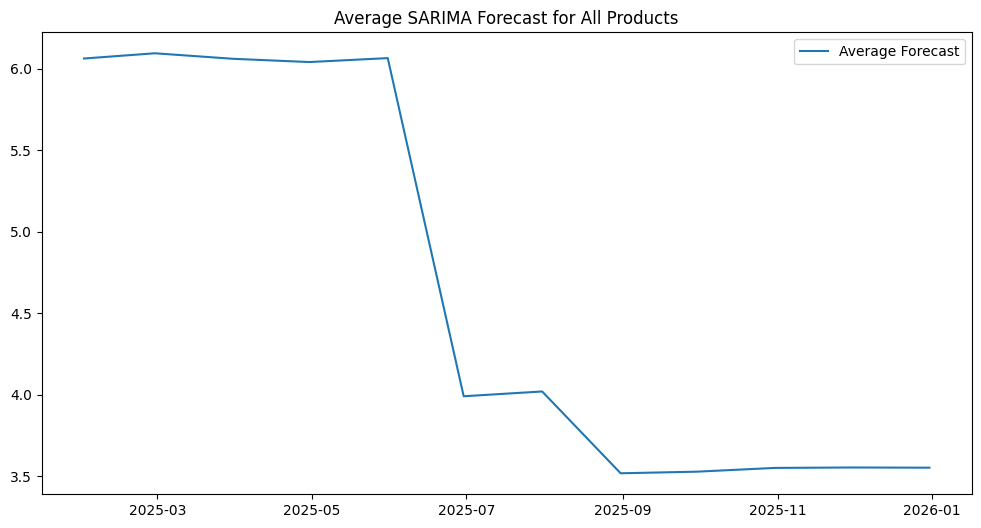

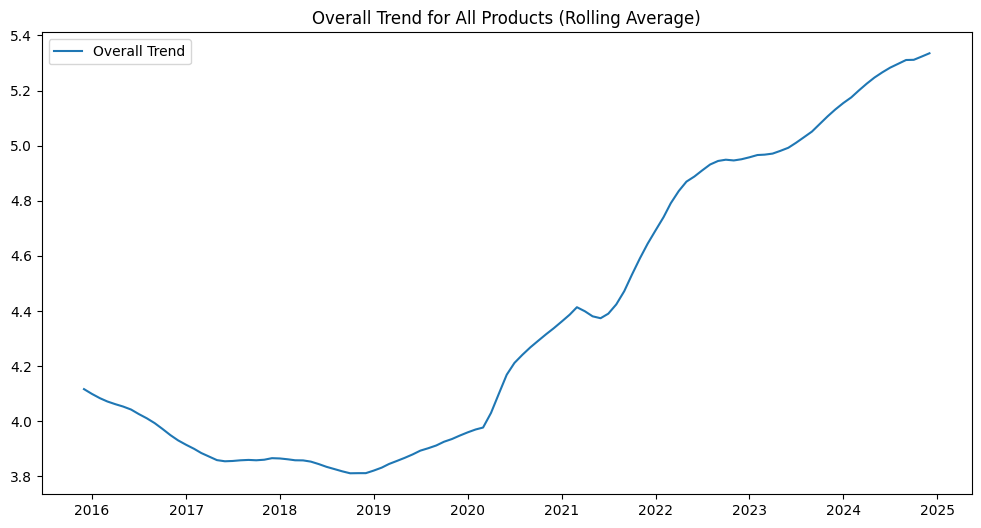

In [ ]:
# prompt: what are the general trends amongst all products combined in the df

import pandas as pd
import matplotlib.pyplot as plt
# Calculate the average forecast for all products
average_forecast = pd.DataFrame(forecasts).mean(axis=1)

# Get the date range for the forecasts
forecast_dates = pd.date_range(data.index[-1], periods=future_steps + 1, freq='M')[1:]

# Ensure average_forecast and forecast_dates have the same length
average_forecast = average_forecast[:len(forecast_dates)]  # Trim average_forecast if necessary

# Plot the average forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_dates, average_forecast, label='Average Forecast') # Use forecast_dates
plt.legend()
plt.title('Average SARIMA Forecast for All Products')
plt.show()

# Calculate the overall trend (e.g., using a rolling average)
rolling_avg = df.mean(axis=1).rolling(window=12).mean()  # Adjust window as needed

# Plot the overall trend
plt.figure(figsize=(12, 6))
plt.plot(df.index, rolling_avg, label='Overall Trend')
plt.legend()
plt.title('Overall Trend for All Products (Rolling Average)')
plt.show()

# You can also analyze the overall growth rate by calculating percentage changes
# or using other statistical methods to identify general trends.

In [ ]:
# prompt: give the standard deviation of these products over time

# Calculate the standard deviation of each product's price over time
product_std_devs = {}
for product_col in df.columns:
    if product_col != 'year_month':
        product_std_devs[product_col] = df[product_col].std()

# Print or use the product_std_devs dictionary as needed
# Example: Print the standard deviation for each product
for product, std_dev in product_std_devs.items():
    print(f"Standard Deviation for {product}: {std_dev}")


Standard Deviation for All Ham (Excluding Canned Ham and Luncheon Slices), per lb. (453.6 gm): 0.6160776437864146
Standard Deviation for All Other Pork (Excluding Canned Ham and Luncheon Slices), per lb. (453.6 gm): 0.4442197282064228
Standard Deviation for All Pork Chops, per lb. (453.6 gm): 0.3773929654221711
Standard Deviation for All Uncooked Beef Roasts, per lb. (453.6 gm): 0.8123468646467472
Standard Deviation for All Uncooked Beef Steaks, per lb. (453.6 gm): 1.255640045673807
Standard Deviation for All Uncooked Other Beef (Excluding Veal), per lb. (453.6 gm): 1.0157064294254725
Standard Deviation for Bacon, sliced, per lb. (453.6 gm): 0.7208231753627626
Standard Deviation for Beef for stew, boneless, per lb. (453.6 gm): 0.7508750918094369
Standard Deviation for Bread, white, pan, per lb. (453.6 gm): 0.25019608612567273
Standard Deviation for Bread, whole wheat, pan, per lb. (453.6 gm): 0.2637664275288205
Standard Deviation for Chicken, fresh, whole, per lb. (453.6 gm): 0.2020824

<ipython-input-98-46b8b32f4cd4>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # Choose a colormap


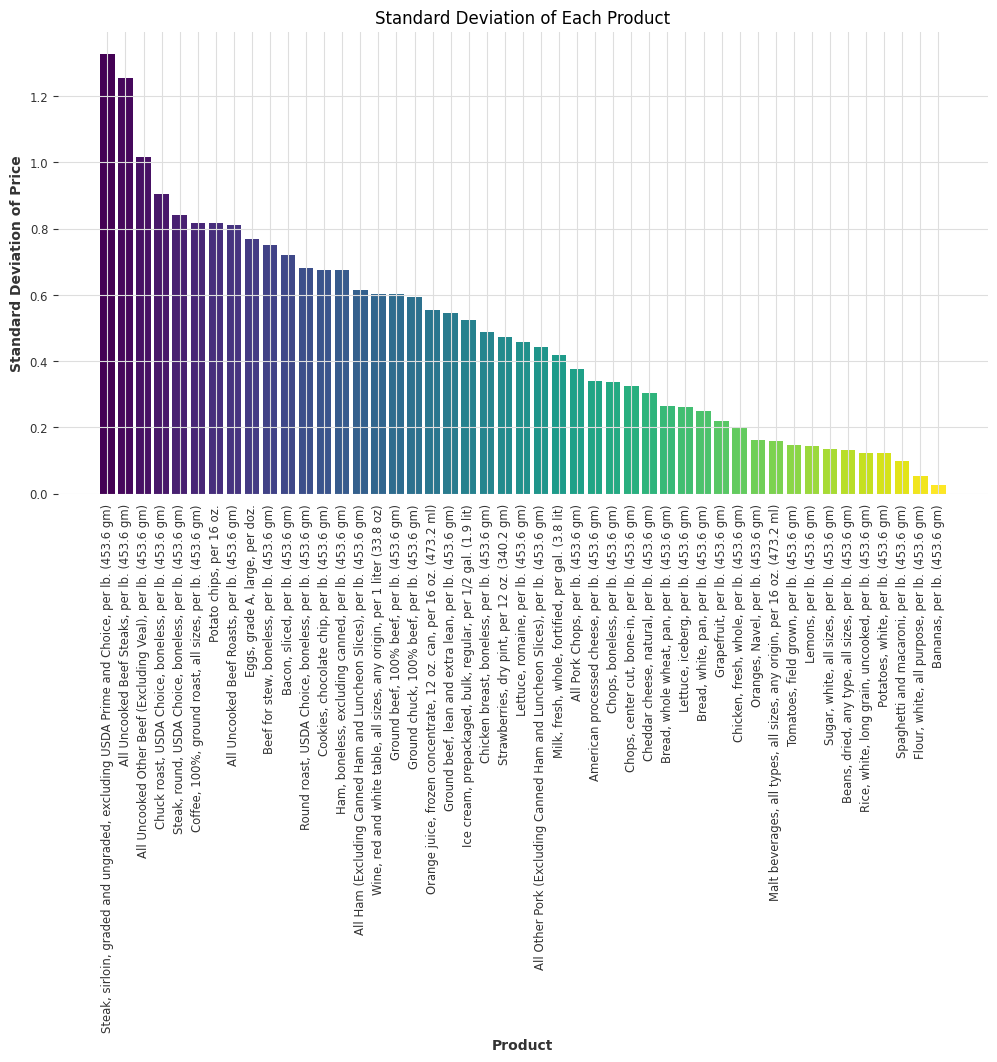

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm  # Import colormap module
import matplotlib.colors as colors


# Calculate the standard deviation of each product's price over time
product_std_devs = {}
for product_col in df.columns:
    if product_col != 'year_month':
        product_std_devs[product_col] = df[product_col].std()

# Sort products by standard deviation in descending order
sorted_std_devs = dict(sorted(product_std_devs.items(), key=lambda item: item[1], reverse=True))

std_dev_products = list(sorted_std_devs.keys())

# Create the plot
plt.figure(figsize=(12, 6))

# Get a colormap (e.g., 'viridis', 'plasma', 'tab20', etc.)
cmap = cm.get_cmap('viridis')  # Choose a colormap
# Create a color normalizer
norm = colors.Normalize(vmin=0, vmax=len(top_10_std_dev_products) - 1)

# Plot standard deviations most volatile products with colors
for i, product in enumerate(top_10_std_dev_products):
    std_dev = product_std_devs[product]
    plt.bar(product, std_dev, color=cmap(norm(i))) # Assign color using colormap

# Customize the plot
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Standard Deviation of Price')
plt.title('Standard Deviation of Each Product')
plt.show()

<ipython-input-99-9268207e92fe>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # Choose a colormap


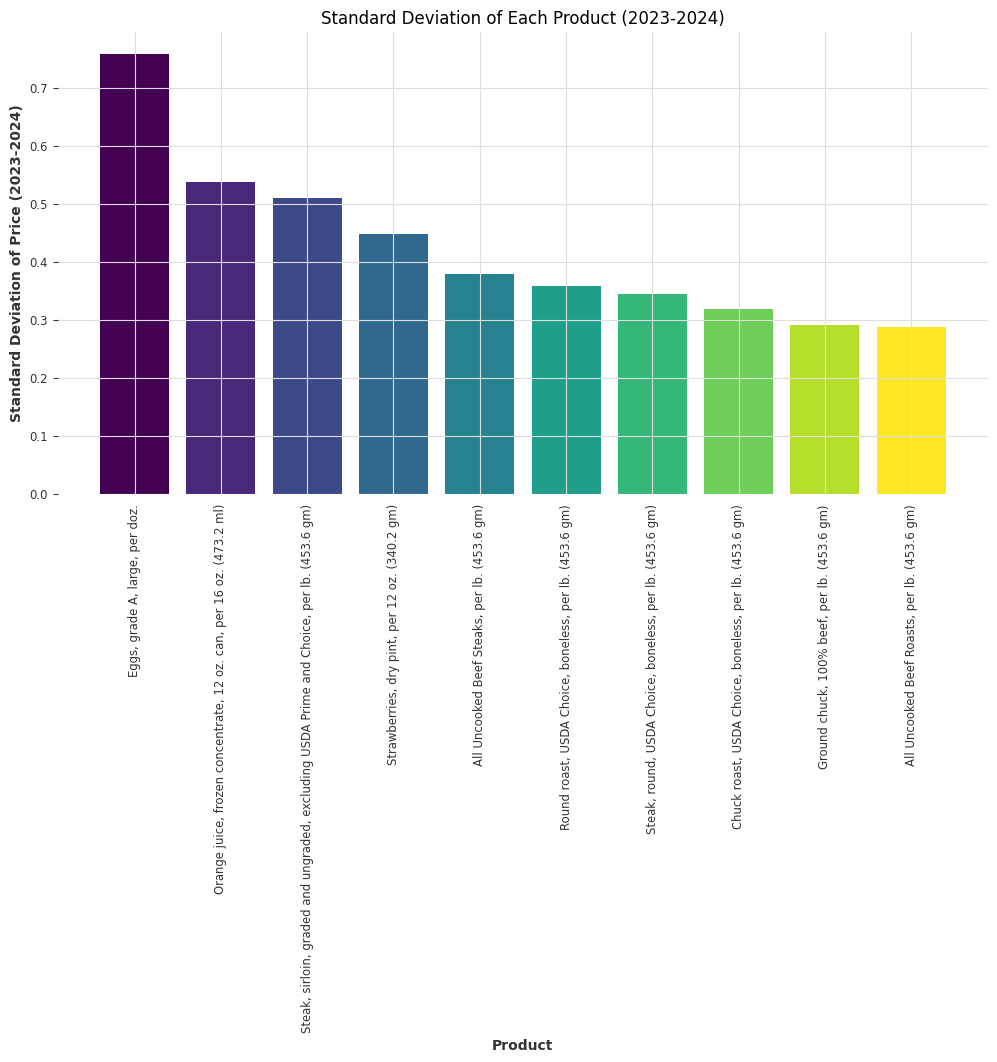

In [ ]:
# prompt: create a visualization of the standard deviation of the items from 2023-2024

import matplotlib.pyplot as plt
# Calculate the standard deviation of each product's price for the years 2023-2024
product_std_devs_2023_2024 = {}
for product_col in df.columns:
    if product_col != 'year_month':
        # Select data for 2023-2024
        data_2023_2024 = df[product_col][(df.index >= '2023-01-01') & (df.index <= '2024-12-31')]
        product_std_devs_2023_2024[product_col] = data_2023_2024.std()

# Sort products by standard deviation in descending order
sorted_std_devs_2023_2024 = dict(sorted(product_std_devs_2023_2024.items(), key=lambda item: item[1], reverse=True))

# Select the top 10 products with the highest standard deviations
top_10_std_dev_products_2023_2024 = list(sorted_std_devs_2023_2024.keys())[:10]

# Create the plot
plt.figure(figsize=(12, 6))

# Get a colormap (e.g., 'viridis', 'plasma', 'tab20', etc.)
cmap = cm.get_cmap('viridis')  # Choose a colormap
# Create a color normalizer
norm = colors.Normalize(vmin=0, vmax=len(top_10_std_dev_products_2023_2024) - 1)


# Plot standard deviations for the top 10 most volatile products with colors
for i, product in enumerate(top_10_std_dev_products_2023_2024):
    std_dev = product_std_devs_2023_2024[product]
    plt.bar(product, std_dev, color=cmap(norm(i)))  # Assign color using colormap

# Customize the plot
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Standard Deviation of Price (2023-2024)')
plt.title('Standard Deviation of Each Product (2023-2024)')
plt.show()


<ipython-input-100-6b3d55696083>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # Choose a colormap


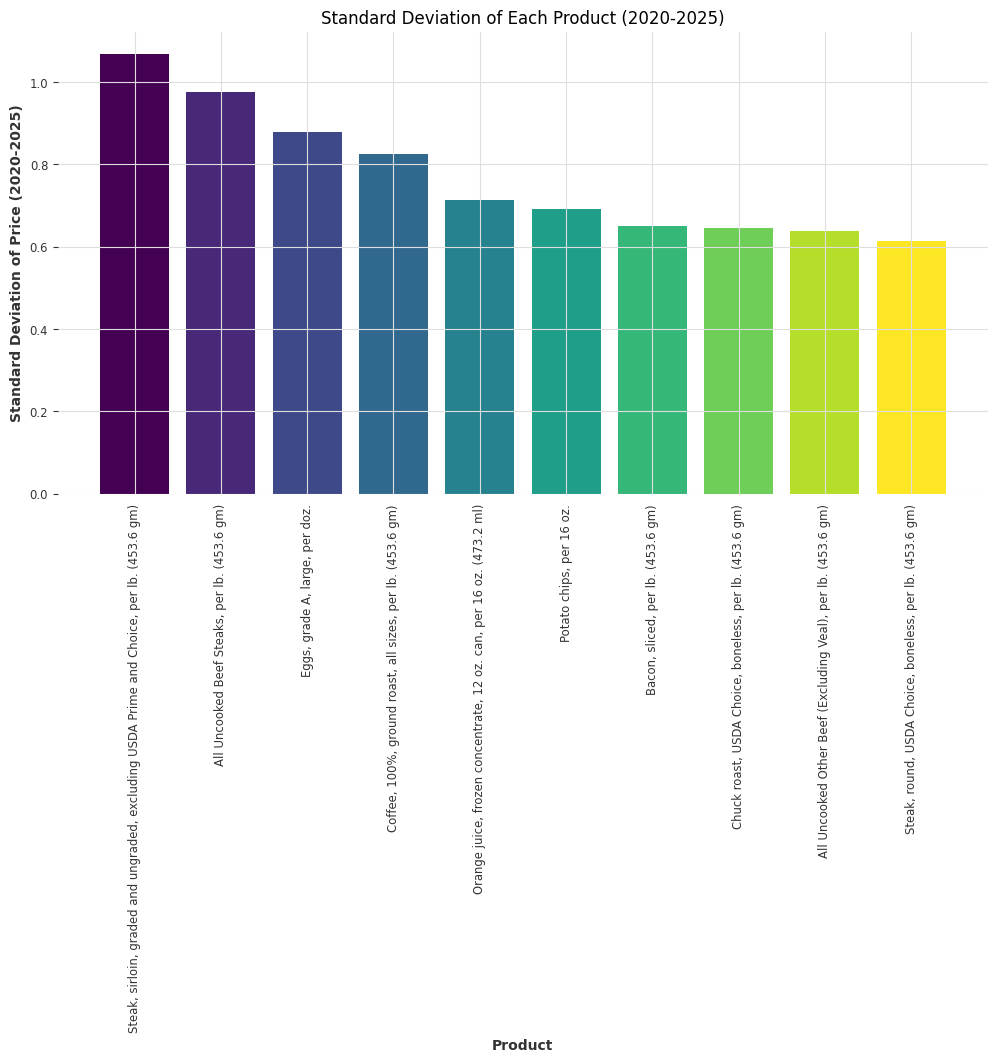

In [ ]:
# prompt: create a visualization of the standard deviation of the items from 2020=-2025

import matplotlib.pyplot as plt
# Calculate the standard deviation of each product's price for the years 2020-2025
product_std_devs_2020_2025 = {}
for product_col in df.columns:
    if product_col != 'year_month':
        # Select data for 2020-2025
        data_2020_2025 = df[product_col][(df.index >= '2020-01-01') & (df.index <= '2025-12-31')]
        product_std_devs_2020_2025[product_col] = data_2020_2025.std()

# Sort products by standard deviation in descending order
sorted_std_devs_2020_2025 = dict(sorted(product_std_devs_2020_2025.items(), key=lambda item: item[1], reverse=True))

# Select the top 10 products with the highest standard deviations
top_10_std_dev_products_2020_2025 = list(sorted_std_devs_2020_2025.keys())[:10]

# Create the plot
plt.figure(figsize=(12, 6))

# Get a colormap (e.g., 'viridis', 'plasma', 'tab20', etc.)
cmap = cm.get_cmap('viridis')  # Choose a colormap
# Create a color normalizer
norm = colors.Normalize(vmin=0, vmax=len(top_10_std_dev_products_2020_2025) - 1)

# Plot standard deviations for the top 10 most volatile products with colors
for i, product in enumerate(top_10_std_dev_products_2020_2025):
    std_dev = product_std_devs_2020_2025[product]
    plt.bar(product, std_dev, color=cmap(norm(i)))  # Assign color using colormap

# Customize the plot
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Standard Deviation of Price (2020-2025)')
plt.title('Standard Deviation of Each Product (2020-2025)')
plt.show()


<ipython-input-101-7f1724a11522>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # Choose a colormap


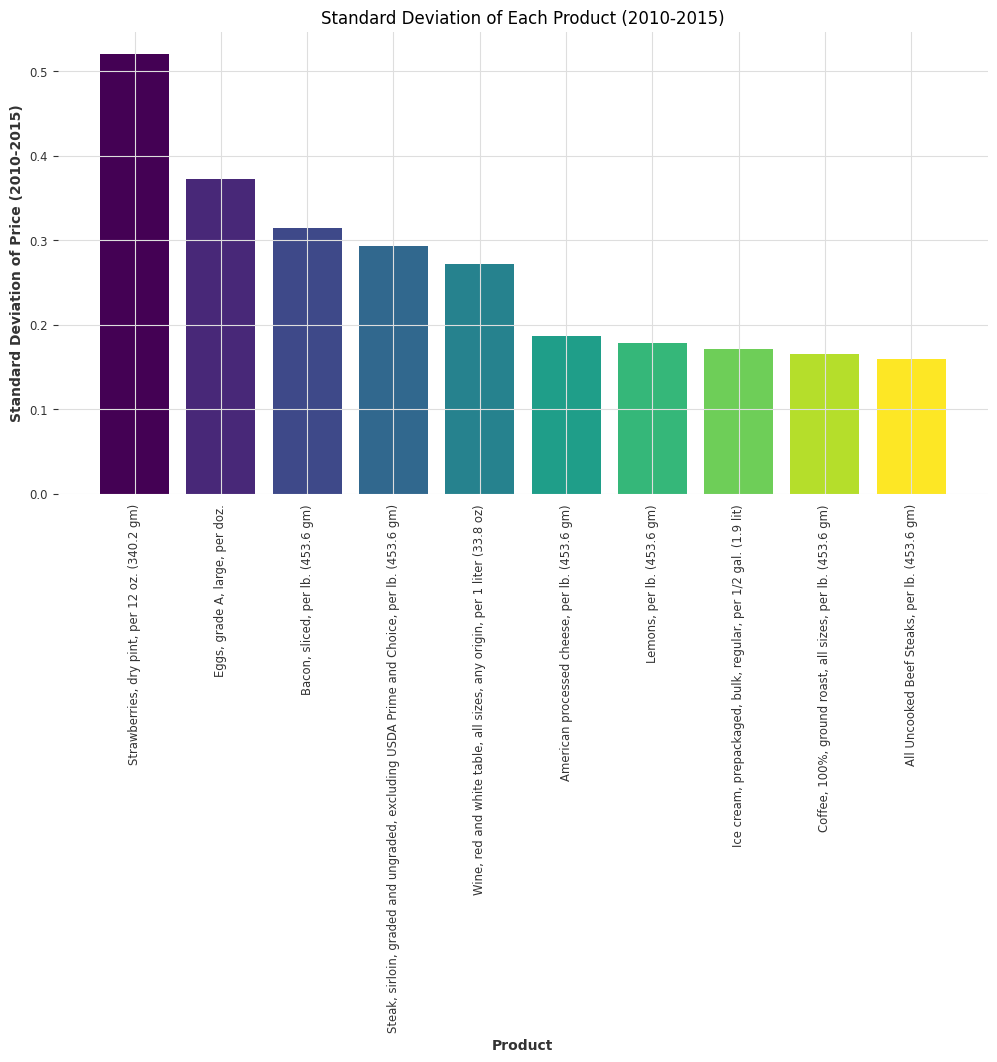

In [ ]:
# prompt: create a visualization of the standard deviation of the items from 2015-2010

import matplotlib.pyplot as plt
# Calculate the standard deviation of each product's price for the years 2015-2010
product_std_devs_2015_2010 = {}
for product_col in df.columns:
    if product_col != 'year_month':
        # Select data for 2015-2010
        data_2015_2010 = df[product_col][(df.index >= '2010-01-01') & (df.index <= '2015-12-31')]
        product_std_devs_2015_2010[product_col] = data_2015_2010.std()

# Sort products by standard deviation in descending order
sorted_std_devs_2015_2010 = dict(sorted(product_std_devs_2015_2010.items(), key=lambda item: item[1], reverse=True))

# Select the top 10 products with the highest standard deviations
top_10_std_dev_products_2015_2010 = list(sorted_std_devs_2015_2010.keys())[:10]

# Create the plot
plt.figure(figsize=(12, 6))

# Get a colormap (e.g., 'viridis', 'plasma', 'tab20', etc.)
cmap = cm.get_cmap('viridis')  # Choose a colormap
# Create a color normalizer
norm = colors.Normalize(vmin=0, vmax=len(top_10_std_dev_products_2015_2010) - 1)

# Plot standard deviations for the top 10 most volatile products with colors
for i, product in enumerate(top_10_std_dev_products_2015_2010):
    std_dev = product_std_devs_2015_2010[product]
    plt.bar(product, std_dev, color=cmap(norm(i)))  # Assign color using colormap

# Customize the plot
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Standard Deviation of Price (2010-2015)')
plt.title('Standard Deviation of Each Product (2010-2015)')
plt.show()


<ipython-input-102-a17a7937d13a>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # Choose a colormap


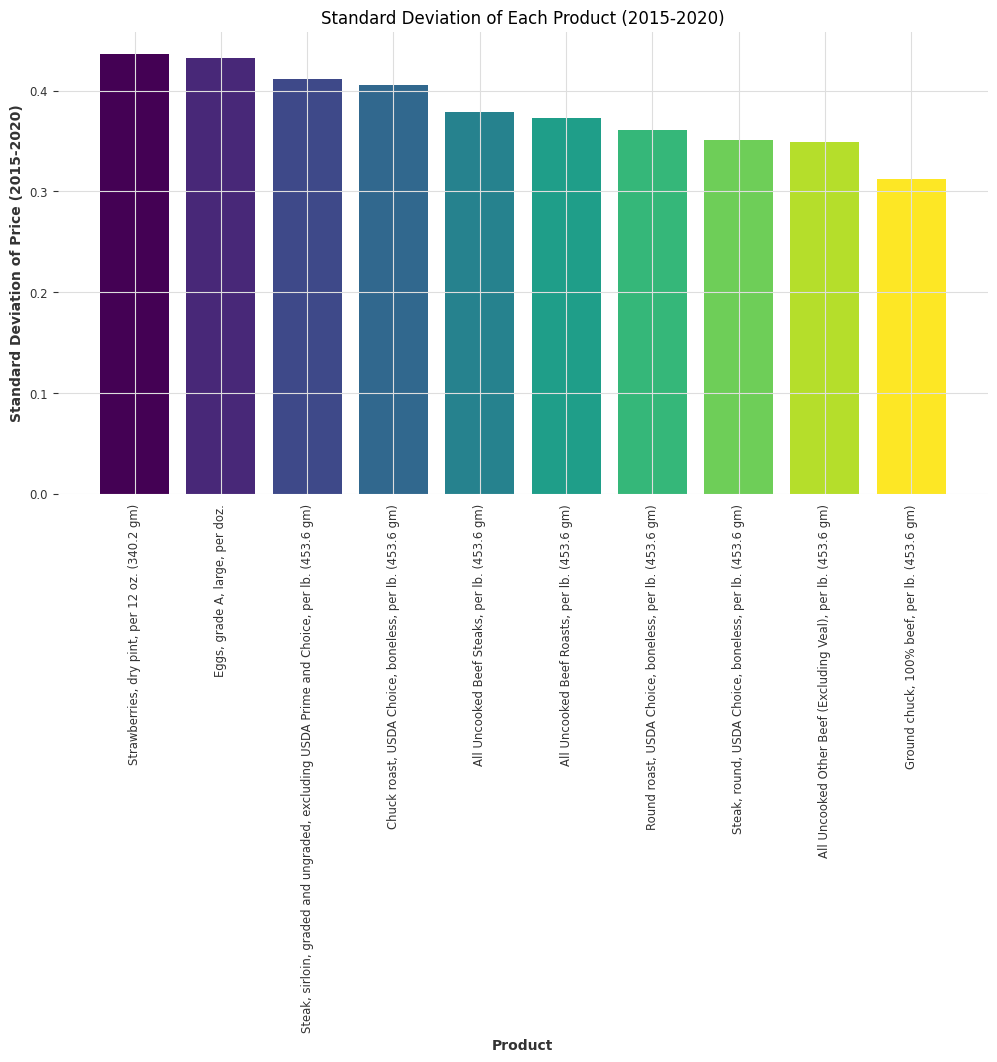

In [ ]:
# prompt: create a visualization of the standard deviation of the items from 2015-2020

import matplotlib.pyplot as plt
# Calculate the standard deviation of each product's price for the years 2015-2020
product_std_devs_2015_2020 = {}
for product_col in df.columns:
    if product_col != 'year_month':
        # Select data for 2015-2020
        data_2015_2020 = df[product_col][(df.index >= '2015-01-01') & (df.index <= '2020-12-31')]
        product_std_devs_2015_2020[product_col] = data_2015_2020.std()

# Sort products by standard deviation in descending order
sorted_std_devs_2015_2020 = dict(sorted(product_std_devs_2015_2020.items(), key=lambda item: item[1], reverse=True))

# Select the top 10 products with the highest standard deviations
top_10_std_dev_products_2015_2020 = list(sorted_std_devs_2015_2020.keys())[:10]

# Create the plot
plt.figure(figsize=(12, 6))

# Get a colormap (e.g., 'viridis', 'plasma', 'tab20', etc.)
cmap = cm.get_cmap('viridis')  # Choose a colormap
# Create a color normalizer
norm = colors.Normalize(vmin=0, vmax=len(top_10_std_dev_products_2015_2020) - 1)

# Plot standard deviations for the top 10 most volatile products with colors
for i, product in enumerate(top_10_std_dev_products_2015_2020):
    std_dev = product_std_devs_2015_2020[product]
    plt.bar(product, std_dev, color=cmap(norm(i)))  # Assign color using colormap

# Customize the plot
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Standard Deviation of Price (2015-2020)')
plt.title('Standard Deviation of Each Product (2015-2020)')
plt.show()


<ipython-input-87-a509e16cb4e5>:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


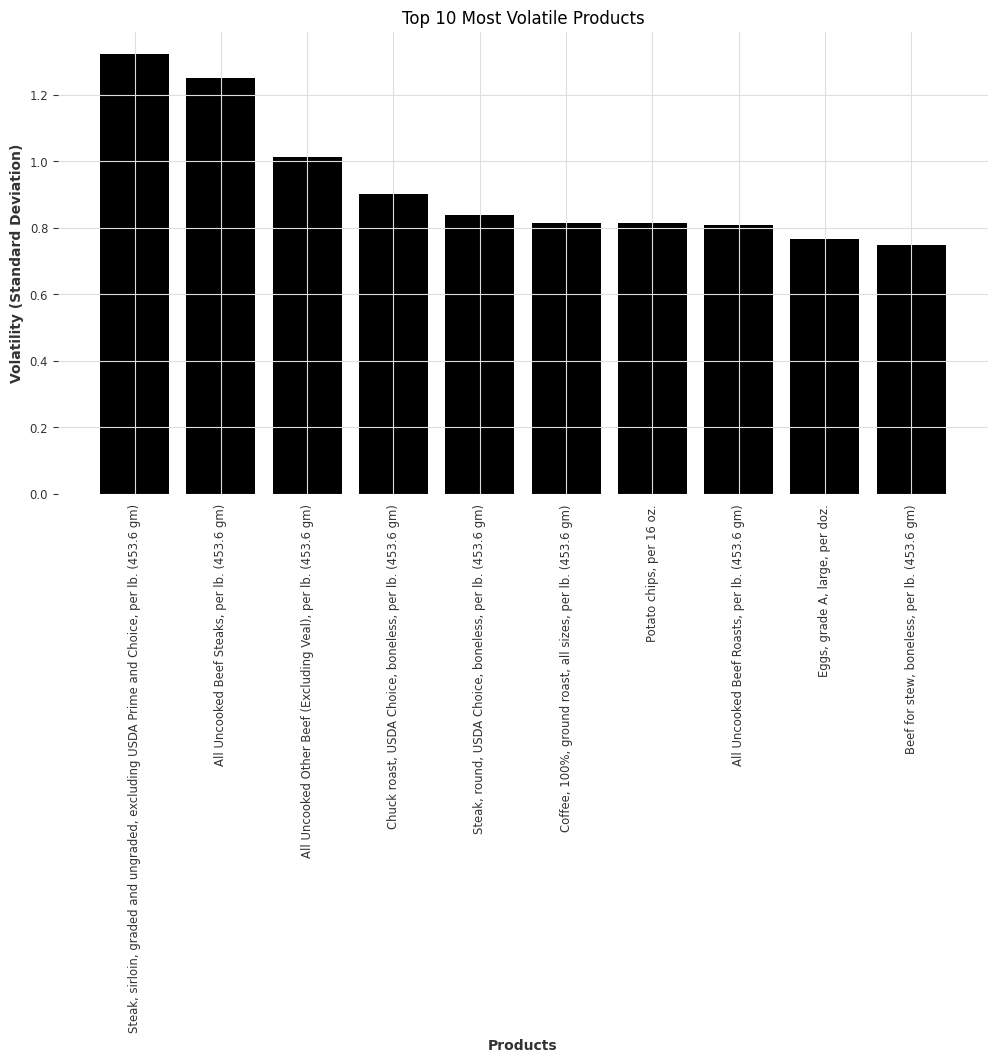

In [ ]:
# prompt: create a visualization for the products that are most volitile

import matplotlib.pyplot as plt
import numpy as np
# Calculate volatility for each product
volatilities = {}
for product_col in df.columns:
  if product_col != 'year_month':
    data = df[[product_col]].dropna()
    volatilities[product_col] = np.std(data[product_col])

# Sort products by volatility in descending order
sorted_volatilities = dict(sorted(volatilities.items(), key=lambda item: item[1], reverse=True))

# Select the top N most volatile products (e.g., top 10)
top_n = 10
top_volatile_products = list(sorted_volatilities.keys())[:top_n]

# Create a bar plot of volatility for the top N products
plt.figure(figsize=(12, 6))
plt.bar(top_volatile_products, [sorted_volatilities[product] for product in top_volatile_products])
plt.xlabel('Products')
plt.ylabel('Volatility (Standard Deviation)')
plt.title(f'Top {top_n} Most Volatile Products')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()